# Project: Sentiment Analysis on Elon Musk's tweets to asses impact on TSLA stock
#[Alejandro Gonzalez]


# Introduction:



In this project, our focus revolves around an analysis of Elon Musk's tweets, aiming to discern potential relations between his social media activity and the movements in Tesla's stock prices. Elon Musk, a prominent figure with a significant presence on Twitter, commands an extensive following. Despite his massive influence, Musk's tweets have often been characterized as impulsive and criticized for their apparent lack of forethought.

One incident that particularly triggered our interest occurred in 2018 when Musk faced legal consequences following a tweet about taking Tesla private. This event served as a catalyst, prompting us to investigate whether Musk's tweets had discernible impacts on Tesla's stock prices.

Before embarking on this project, we undertook extensive preliminary research. Several reputable newspapers had already highlighted the intriguing relationship between Musk's tweets and the stock market, adding depth and context to our exploration. With a keen awareness of the complexities surrounding Musk's Twitter presence and its potential implications for Tesla's financial landscape, our project dives into this intricate intersection of social media, public perception, and stock price dynamics. We are going to observe his growing popularity, the sentiment of some of his tweets while visualizing plots that give us insight into plausible speech keywords that could impact his own Tesla stock price.




# Motivation (Data-Driven Question or Problem):




Do tweets create a significant impact on stock prices in order to establish a trend? Is it possible to quantify this impact by the use of sentiment analysis? Do investors tend to react consistently to tweets containing certain word configurations?

Twitter may be the fastest social media platform to widely broadcast short messages. Thus, for certain influential profiles with direct ties to publicly listed companies, it is possible that their tweets may directly influence an important segment of their shareholders, potentially impacting their company's stock price. A perfect example of this concept could be Elon Musk, given his high tweet frequency and strong relationship with the tech sector. This raises the probability that his tweets influence a significant portion of his shareholders.

As identified by Smith and O'Hare in their study "*Comparing traditional news and social media with stock price movements; which comes first, the news or the price change?" (2022)*, there is indeed a reaction to social media messages, particularly tweets, from CEOs by their shareholders and investors. However, the correlation isn't particularly strong according to their methodology. The authors state:

"*... it is still promising that there is some evidence of sentiment driving prices, meaning this may be a good thing to research further. Correlations between sentiment and price movements, where they exist, are most significant on the day of publication, suggesting the impact of the news is short-lived.*" (Smith & O'Hare 2022)

The authors suggest deep learning techniques to identify and quantify further and stronger correlations. A study by Yinghao Ren, Fangqing Liao, and Yongjing Gong in 2020 supports this idea, as their use of deep learning in a short and long-term bidirectional model to extract the impact of news headlines on stock prices shows a statistically significant trend towards investors' reactions when certain words are used and certain conditions are met.

Therefore, our motivation lies in the idea of selecting the most influential and controversial figures in our era, such as Elon Musk, and gathering all of his tweets in a delimited time span up to 2021. We would tokenize this information to extract only relevant content and use a weighted word model to quantify their sentiment. Finally, we would overlap our results with actual Tesla stock prices, looking for identifiable trends.

*Note: Special focus is given to the pandemic period, as suggested by Smith & O'Hare.*




# Solution (Data Analysis Process):



Nowadays, since Elon Musk arrived to Twitter's board (now "X"), data collection is harder as webscrapping is not entirelly allowed and th famous Twitter API is now restricted onl to certain Twitter Developper account, it would be possible to recollect latest data but application process to obtain a developper account are time incertain, so as a workaround the latest data recopilation publicly availlable accounts up until April 2021, wich was the one used in this project.

Nevertheless, its important to clarify that a newer dataset could be included without any problem as long as data is arranged to match current data formats.

For the case of Tesla (TSLA from now on) stock prices, data was extracted from Yahoo Finance.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import os
import pandas as pd

DIR_PYTHON_PROJECT = '/gdrive/My Drive'

DIR_DATA = os.path.join(DIR_PYTHON_PROJECT, "TweetsElonMusk.csv")

import sys
!pip install -U ydata-profiling[notebook]==4.5.1
!jupyter nbextension enable --py widgetsnbextension

ls: cannot access 'drive/Shareddrives/': No such file or directory



##Data Preparation:



In [ ]:
tweets=pd.read_csv(DIR_DATA)
tweets["created_at"].sort_values() #tweets from 2010-06-04//2021-04-17
pd.set_option('display.max_columns', None) #3. Option to force all columns to display

#clean columns that we won't use
tweets = tweets[["id", "date", "time", "tweet", "mentions", "urls", "photos","replies_count", "retweets_count", "likes_count", "hashtags", "link"]]

#dummy variables
tweets['D_Mentions'] = tweets['mentions'].apply(lambda x: False if len(x) == 2 else True)
tweets["D_URLS"] = tweets['urls'].apply(lambda x: False if len(x) == 2 else True)
tweets["D_photos"] = tweets['photos'].apply(lambda x: False if len(x) == 2 else True)
tweets["D_hashtags"] = tweets['hashtags'].apply(lambda x: False if len(x) == 2 else True)

#convert to DateTime
tweets["date"]=pd.to_datetime(tweets["date"])

#put the two columns in lower case
tweets[['tweet', 'mentions']] = tweets[['tweet', 'mentions']].applymap(lambda x: x.lower())

#double check if the line above worked as expected:
#tweets['mentions'][tweets['D_Mentions']==True]

#add column with total daily tweets
reduced = tweets['date'].groupby(tweets['date']).size().reset_index(name='Count')
tweets.merge(reduced, left_on='date', right_on = 'date')

#day with more tweets. 2018-06-17
reduced[reduced["Count"] ==  reduced["Count"].max()]["date"]


1098   2018-06-17
Name: date, dtype: datetime64[ns]

#Data Exploration:


PRELIMINARY DATA PROFILING

In [ ]:
from pandas_profiling import ProfileReport
#Create an automatic data profile that will give a general high-level overview of the data
profile = ProfileReport(tweets, title='Tweets: Profiling Report',
                        html={'style':{'full_width':True}})

#Defining where this overview is created
profile.to_file(output_file=os.path.join(DIR_PYTHON_PROJECT, 'tweets_data_profile.html'))

<ipython-input-3-768cbd817bae>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DAILY TWEETS

Text(0, 0.5, 'Frequency')

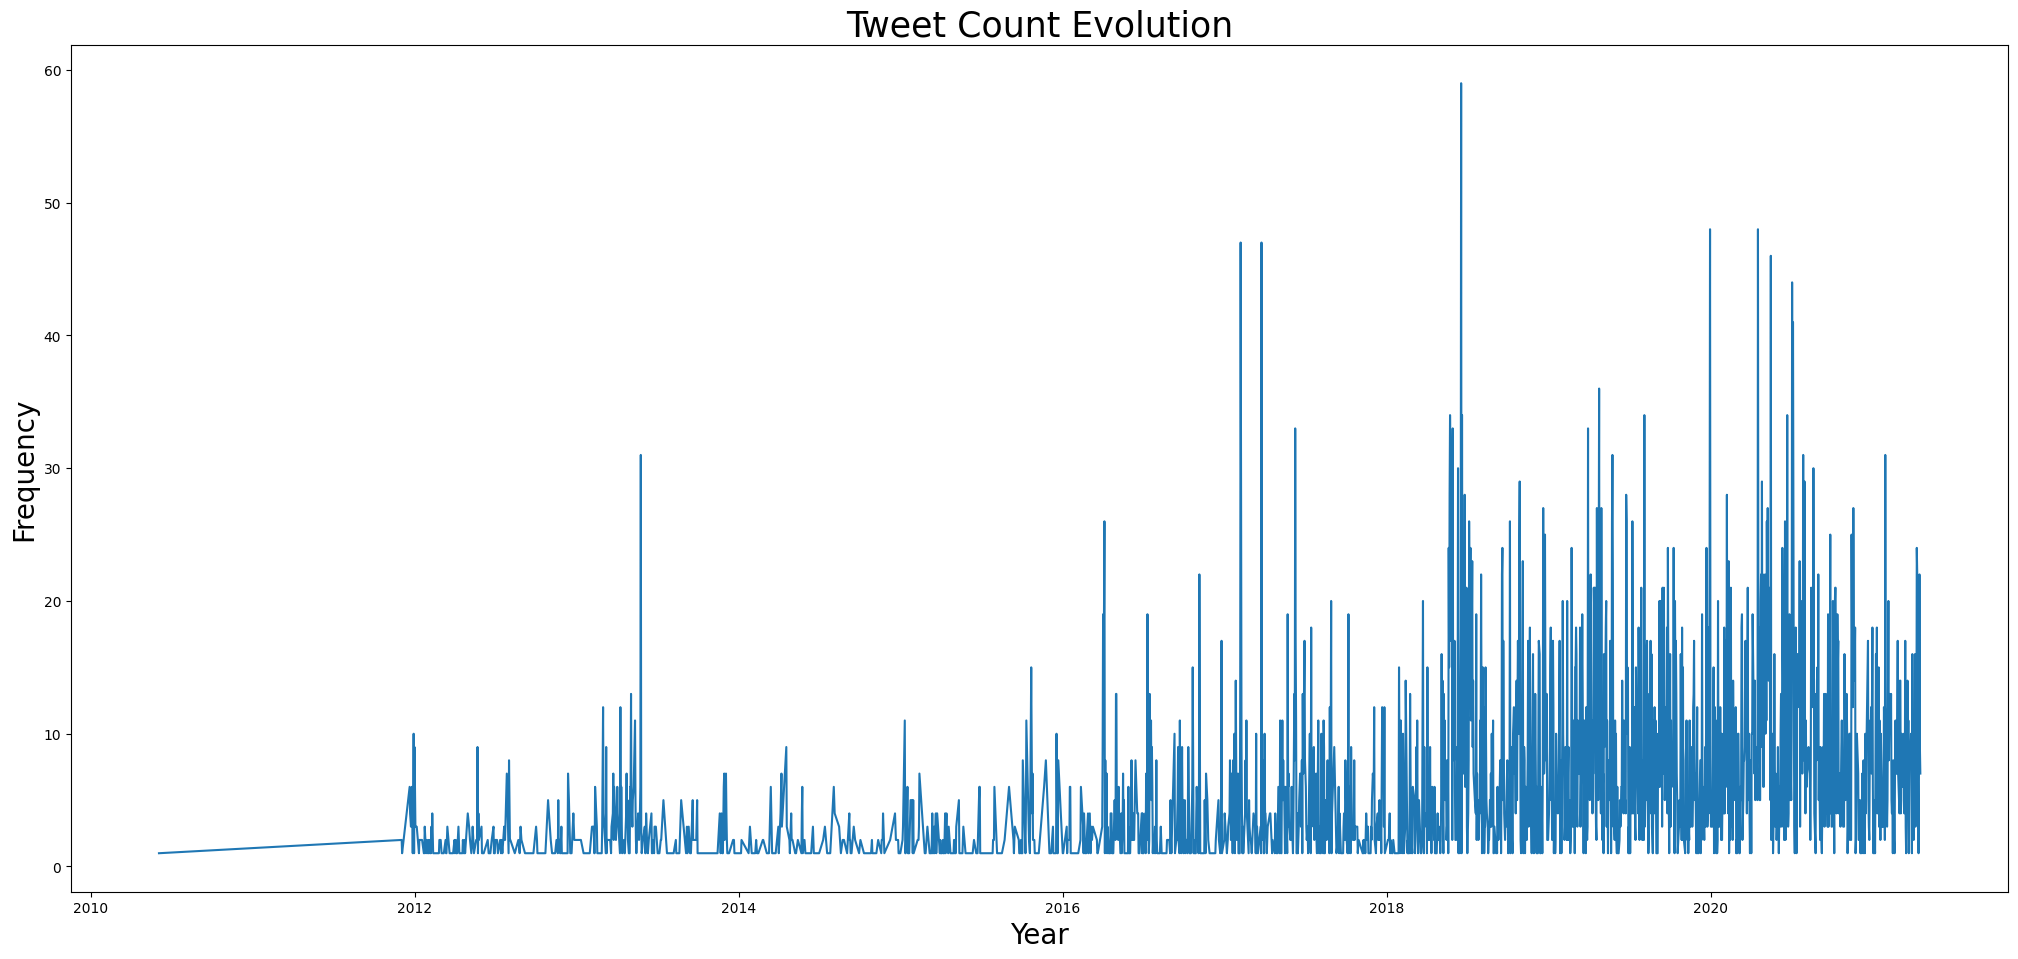

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Yearly evolution
date_count_df = tweets.groupby("date")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="date", y="tweet",)

#ax = sns.histplot(data=date_count_df, x="date", y="tweet")
#sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

MONTHLY TWEETS EVOLIUTION


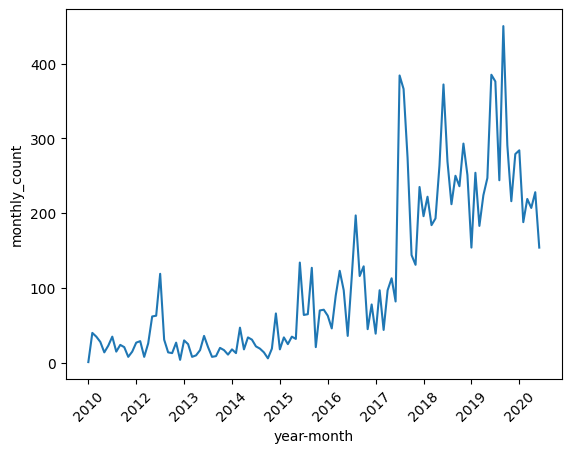

,year,month,monthly_count,year-month
0,2010,6,1,2010-6
1,2011,12,40,2011-12
2,2012,1,35,2012-1
3,2012,2,28,2012-2
4,2012,3,14,2012-3
...,...,...,...,...
109,2020,12,188,2020-12
110,2021,1,219,2021-1
111,2021,2,207,2021-2
112,2021,3,228,2021-3


In [ ]:
tweets['month'] = tweets['date'].dt.month
tweets['year'] = tweets['date'].dt.year

rand=tweets.groupby(["year","month"])["tweet"].count().reset_index(name='monthly_count')
rand['year-month'] = rand['year'].astype(str) + '-' + rand['month'].astype(str)

ax=sns.lineplot(data=rand, x="year-month", y="monthly_count")
plt.xticks(range(0, len(rand), 12), rand["year"][::12], rotation=45)
plt.show()
rand

PLOT OF COMMULATED TWEETS - ELON EVOLUTION

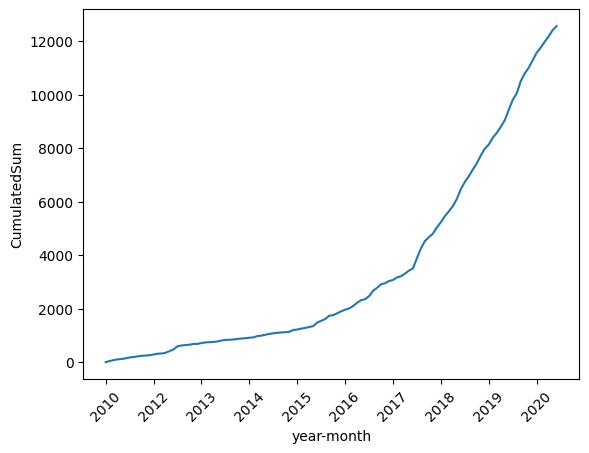

In [ ]:
rand["CumulatedSum"]=rand["monthly_count"].cumsum()
ax=sns.lineplot(data=rand, x="year-month", y="CumulatedSum")
plt.xticks(range(0, len(rand), 12), rand["year"][::12], rotation=45)
plt.show()

POPULARITY

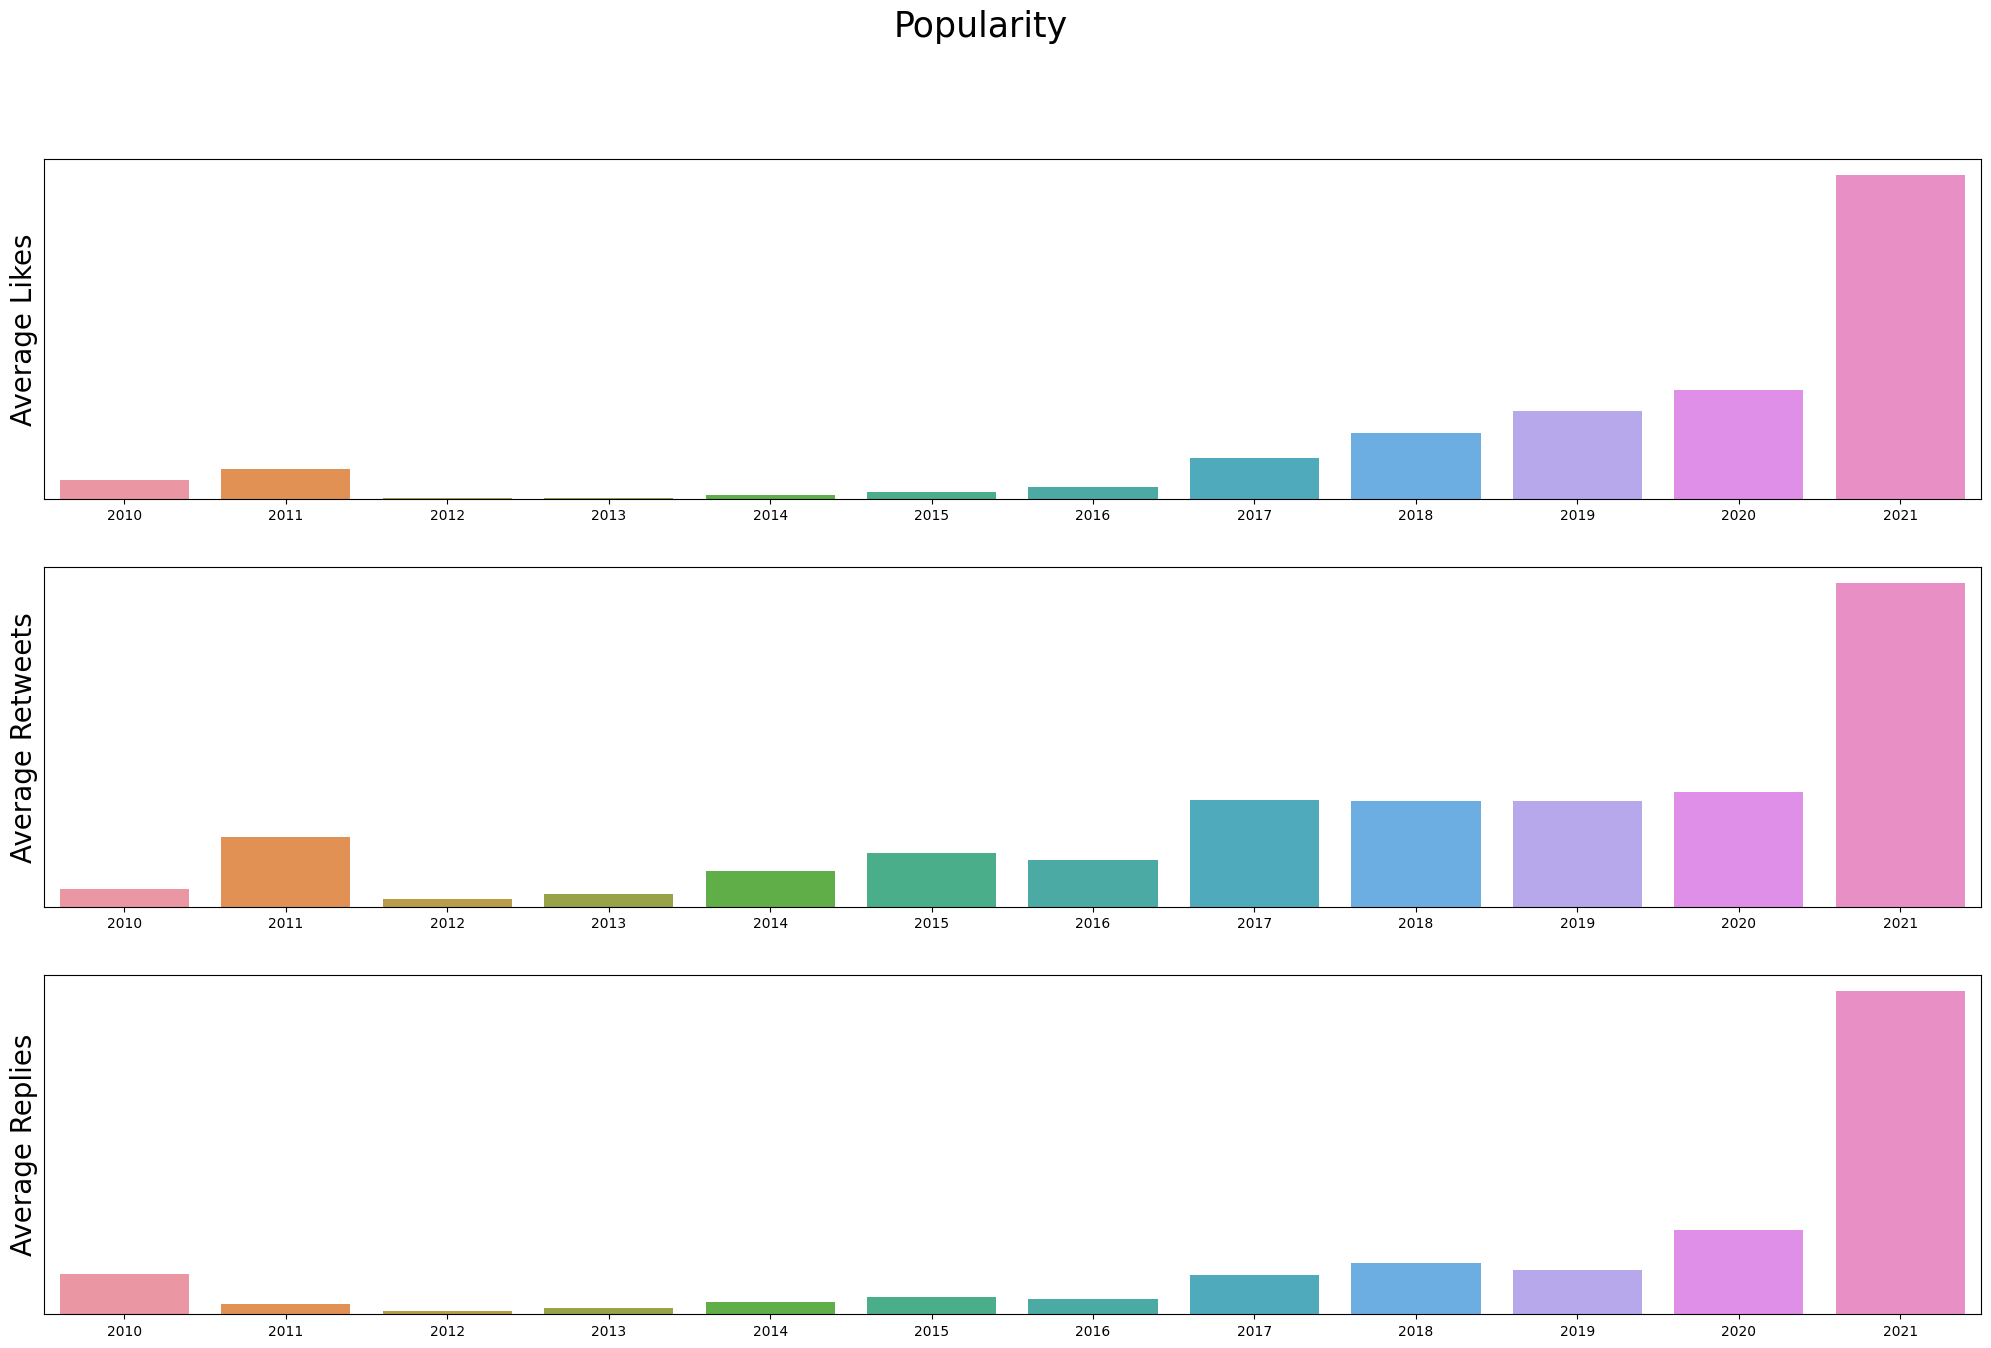

In [ ]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year", y="likes_count", ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count",  ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)

Data Analysis:



In order to perform a sentiment analysis we will first create a single string with all tweets separated by speces to then separate all words (tokens) into a list so that it is possible to count them and extract those who are most used.

JOINING ALL TWEETS

In [ ]:
all_tweets = ' '.join([str(x) for x in tweets['tweet']])
all_tweets

'@vincent13031925 for now. costs are decreasing rapidly. love this beautiful shot @agnostoxxx @cathiedwood @arkinvest trust the shrub the art in cyberpunk is incredible @itsallrisky 🤣🤣 @seinfeldguru @wholemarsblog nope haha @wholemarsblog if you don’t say anything &amp; engage autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar @deltavphotos @portcanaveral that rocket is a hardcore veteran of many missions blimps rock  https://t.co/e8cu5fknoi @engineers_feed due to lower gravity, you can travel from surface of mars to surface of earth fairly easily with a single stage rocket. earth to mars is vastly harder. @drphiltill good thread @alexellisuk pretty much @tesla_adri @wholemarsblog these things are best thought of as probabilities. there are 5 forward-facing cameras. it is highly likely that at least one of them will see multiple cars ahead. @wholemarsblog sensors are a bitstream and cameras have several orders of magnitude more 

SENTIMENT ANALYSIS PACKAGES

In [ ]:
from numpy.ma.core import concatenate
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

SPLITING WORDS INTO TOKENS

In [ ]:
tokens = word_tokenize(all_tweets)
tokens

['@',
 'vincent13031925',
 'for',
 'now',
 '.',
 'costs',
 'are',
 'decreasing',
 'rapidly',
 '.',
 'love',
 'this',
 'beautiful',
 'shot',
 '@',
 'agnostoxxx',
 '@',
 'cathiedwood',
 '@',
 'arkinvest',
 'trust',
 'the',
 'shrub',
 'the',
 'art',
 'in',
 'cyberpunk',
 'is',
 'incredible',
 '@',
 'itsallrisky',
 '🤣🤣',
 '@',
 'seinfeldguru',
 '@',
 'wholemarsblog',
 'nope',
 'haha',
 '@',
 'wholemarsblog',
 'if',
 'you',
 'don',
 '’',
 't',
 'say',
 'anything',
 '&',
 'amp',
 ';',
 'engage',
 'autopilot',
 ',',
 'it',
 'will',
 'soon',
 'guess',
 'based',
 'on',
 'time',
 'of',
 'day',
 ',',
 'taking',
 'you',
 'home',
 'or',
 'to',
 'work',
 'or',
 'to',
 'what',
 '’',
 's',
 'on',
 'your',
 'calendar',
 '@',
 'deltavphotos',
 '@',
 'portcanaveral',
 'that',
 'rocket',
 'is',
 'a',
 'hardcore',
 'veteran',
 'of',
 'many',
 'missions',
 'blimps',
 'rock',
 'https',
 ':',
 '//t.co/e8cu5fknoi',
 '@',
 'engineers_feed',
 'due',
 'to',
 'lower',
 'gravity',
 ',',
 'you',
 'can',
 'travel',
 

LOWER CASE

In [ ]:
lower_tokens = [t.lower() for t in tokens]

ESTABLISHING EXCLUDED WORDS

In [ ]:
from itertools import chain
english_stops = pd.read_csv(os.path.join(DIR_DATA,os.path.join(DIR_PYTHON_PROJECT, "englishstopwords.csv")), index_col = False).values.tolist()
english_stops = list(chain(*english_stops))
#Ensuring all data to be in a list

our_stops = ['i', 'http', 'yes', 'amp']
#Adding our words to not be counted


english_stops += our_stops
#Adding our list to a single big list


print(english_stops)

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', '

EXTRACTING ALPHANUMERIC

In [ ]:
from nltk.stem import WordNetLemmatizer


alpha_only = [t for t in lower_tokens if t.isalpha()] # Retain alphabetic words, i.e. eliminate punctuation, signs and numbers among others
no_stops = [t for t in alpha_only if t not in english_stops] # Remove all stop words


CREATING A BAG OF WORDS

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(a) for a in no_stops ] #Doble check as Lemmatizer uses its own stops
lemmatized = [t for t in lemmatized if t not in english_stops] # Lemmatize all tokens into a new list, means to group together similar groups of words
bow = Counter(lemmatized) # Create the bag-of-words

# Print the 10 most common tokens
print(bow.most_common(10))

[('tesla', 1759), ('spacex', 720), ('erdayastronaut', 614), ('car', 573), ('good', 501), ('flcnhvy', 445), ('year', 431), ('like', 419), ('model', 409), ('would', 402)]


WORLD CLOUD

In [ ]:
one_string = ' '.join(token for token in lemmatized)
one_string

'cost decreasing rapidly love beautiful shot agnostoxxx cathiedwood arkinvest trust shrub art cyberpunk incredible itsallrisky seinfeldguru wholemarsblog nope haha wholemarsblog say anything engage autopilot soon guess based time day taking home work calendar deltavphotos portcanaveral rocket hardcore veteran many mission blimp rock due lower gravity travel surface mar surface earth fairly easily single stage rocket earth mar vastly harder drphiltill good thread alexellisuk pretty much wholemarsblog thing best thought probability camera highly likely least one see multiple car ahead wholemarsblog sensor bitstream camera several order magnitude radar lidar radar must meaningfully increase bitstream worth complexity integrating vision processing get better leaf radar far behind wholemarsblog radar vision disagree one believe vision much precision better double vision sensor fusion wholemarsblog major problem need leg starship launch tower catch giant rocket booster basically mechazilla w

This word frequency will be plotted into a word cloud, from which its possible to obsere frequency as a the direct proportion with the size pf the words

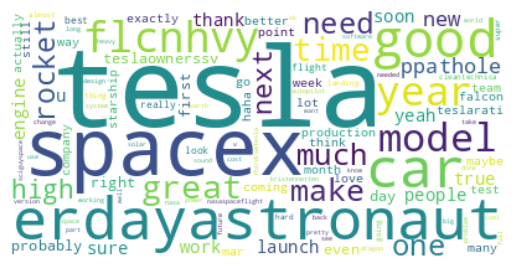

In [ ]:
from wordcloud import WordCloud
twitter_wc = WordCloud(collocations = False, background_color= 'white').generate(one_string)  #Create a word cloud with the string previously created
plt.imshow(twitter_wc, interpolation='bilinear') #Plotting method
plt.axis("off")
plt.show()

APPLY TWITTER MASK

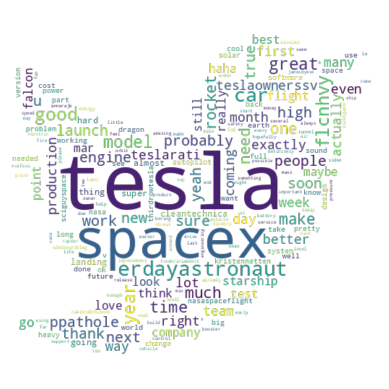

In [ ]:
import numpy as np
from PIL import Image
mask = np.array(Image.open(os.path.join(DIR_PYTHON_PROJECT, "twitter3.png"))) #Use a Twitter logo image to create  mask to be filled with words
inverted_mask = 255 - mask #Invert the mask in order to fill the logo not the background
twitter_wc = WordCloud(collocations = False, background_color= None, mode="RGBA", mask =inverted_mask ).generate(one_string) #Create a word cloud with the string previously created
plt.figure()
plt.imshow(twitter_wc, interpolation='bilinear')
plt.axis("off")
#plt.savefig("twitter.png",  format="png", transparent=True) #To save the image
plt.show()

Secuencially the information regarding the tweets containing tesla is extracted

TWEET WITH MOST RETWEETS ABOUT TESLA

In [ ]:
tweets_about_tesla=tweets[tweets['tweet'].str.contains(r'(?<!@)\btesla\b(?!@)', case=False, regex=True)]

test = tweets[tweets['tweet'].str.contains(r'(?<!@)\bFounding\b(?!@)', case=False, regex=True)]

r=tweets[tweets['date']=="2018-08-07"]["tweet"]

mostRT=tweets_about_tesla["retweets_count"].max() #
Retweets=tweets_about_tesla[tweets_about_tesla["retweets_count"] ==  mostRT][["tweet","date"]]

Retweets


,tweet,date
164,you can now buy a tesla with bitcoin,2021-03-24


TWEETS ABOUT TSLA

In [ ]:
r

7931    investor support is confirmed. only reason why...
7932    @mindfieldmusic def no forced sales. hope all ...
7933    @thatspacegeek yes, but liquidity events would...
7934                           @fredericlambert no change
7935    shareholders could either to sell at 420 or ho...
7936    @heydave7 absolutely. am super appreciative of...
7937    @gfilche my hope is *all* current investors re...
7938                                    @evotorentals yes
7939    @fredericlambert i don’t have a controlling vo...
7940                                       good morning 😀
7941                                @lizclaman @tesla 420
7942    am considering taking tesla private at $420. f...
Name: tweet, dtype: object

MOST LIKED TWEET

In [ ]:
mostL=tweets_about_tesla["likes_count"].max()
Mostlikes=tweets_about_tesla[tweets_about_tesla["likes_count"] ==  mostL]["tweet"]
tweets_about_tesla[tweets_about_tesla["likes_count"] ==  mostL]["likes_count"]
Mostlikes

tweets_about_tesla[tweets_about_tesla["likes_count"] ==  mostL]["tweet"]


164    you can now buy a tesla with bitcoin
Name: tweet, dtype: object

MOST COMMENTED TWEET

In [ ]:
mostComments=tweets_about_tesla["replies_count"].max()
tweets_about_tesla[tweets_about_tesla["replies_count"] ==  mostComments]["tweet"]

164    you can now buy a tesla with bitcoin
Name: tweet, dtype: object

RATIO OF TESLA TWEETS

In [ ]:
len(tweets_about_tesla)/len(tweets) #% of tweets than mention tesla

0.0801623945231651

SENTIMENT CONFIGURATIONS

In [ ]:
ticker = 'TLSA'
sentiment_tweets = tweets
sentiment_tweets['ticker'] = ticker
sentiment_tweets

,id,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,D_Mentions,D_URLS,D_photos,D_hashtags,month,year,ticker
0,1381273474400800773,2021-04-11,18:50:33,@vincent13031925 for now. costs are decreasing...,[],[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,False,False,False,False,4,2021,TLSA
1,1381273076709478403,2021-04-11,18:48:58,love this beautiful shot,[],[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,False,False,False,False,4,2021,TLSA
2,1381258144916008964,2021-04-11,17:49:38,@agnostoxxx @cathiedwood @arkinvest trust the ...,[],[],[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,False,False,False,False,4,2021,TLSA
3,1381221447322935303,2021-04-11,15:23:49,the art in cyberpunk is incredible,[],[],[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,False,False,False,False,4,2021,TLSA
4,1381129584435818496,2021-04-11,09:18:47,@itsallrisky 🤣🤣,[],[],[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,False,False,False,False,4,2021,TLSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,1382255613665701894,2021-04-14,11:53:14,"@eugenelee3 @ppathole @spacex @tesla yeah, not...",[],[],[],142,102,2362,[],https://twitter.com/elonmusk/status/1382255613...,False,False,False,False,4,2021,TLSA
12558,1382239892445401089,2021-04-14,10:50:45,@ppathole @spacex @tesla that was my night job...,[],[],[],283,270,5209,[],https://twitter.com/elonmusk/status/1382239892...,False,False,False,False,4,2021,TLSA
12559,1382239304097824768,2021-04-14,10:48:25,@ppathole @spacex @tesla true. ancient times …...,[],[],[],598,1158,46198,[],https://twitter.com/elonmusk/status/1382239304...,False,False,False,False,4,2021,TLSA
12560,1382131928619495429,2021-04-14,03:41:45,@erdayastronaut @tesla absolutely,[],[],[],374,204,6051,[],https://twitter.com/elonmusk/status/1382131928...,False,False,False,False,4,2021,TLSA


A weighted dictionary is established subjectivelly so that later one the sentiment model is set in position with the new words previouslly defined

WORD WEIGHTED DICTIONARY

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


new_words = {
   'tsla': 200,
   'tesla': 200,
   'spacex': 5,
   'model': 40,
   'car': 80,
   'engine': 80,
   'new': 40,
   'coming': 30,
   'launch': 30,
   'rocket': 5,
   'starship': 10,
   'falcon': 10,
   'flight': 10,
   'landing': 10,
   'space': 10,
   'software': 10,
   'earth': 10,
   'nasa': 10,
   'change': 10,
   'design': 10,
   'future': 70,
   'cool': 10,
   'world': 10,
   'power': 30,
   'sound': 10,
   'autopilot': 90,
   'solar': 10,
   'version': 50,
   'tunnel': 10,
   'battery': 80,
   'hopefully': 10,
   'real': 5,
   'orbit': 10,
   'drive': 10,
   'important': 10,
   'energy': 13,
   'ship': 10,
   'vehicle': 80,
   'electric': 80,
   'electrical': 80,
   'speed': 30,
   'boring': 5,
   'preassure': 10,
   'x': 10,
   'improvements': 30,
   'release': 10,
   'improved': 10,
   'amazing': 10,
   'safety': 30,
   'price': 80,
   'control': 10,
   'factory': 10,
   'owner': 10,
   'public': 10,
   'moon': 10,
   'china': 10,
   'supercharger': 30,
   'human': 20,
   'motor': 35,
   'land': 10,
   'idea': 10,
   'water': 10,
   'awesome': 15,
   'likely': 10,
   'tomorrow': 40,
   'hope': 10,
   'twitter': 10,
   'upgrade': 35,
   'upgrades': 35,
   'gas': 10,
   'orbital': 10,
   'propellant': 10,
   'night': 10,
   'bad': -15,
   'performance': 30,
   'satellite': 10,
   'review': 10,
   'station': 10,
   'boringcompany': 10,
   'company': 10,
   'testing': 10,
   'interesting': 10,
   'life': 15,
   'live': 15,
   'increase': 10,
   'neuralink': 10,
   'city': 10,
   'road': 20,
   'fly': 10,
   'progress': 40,
   'improve': 40,
   'traffic': 20,
   'coronavirus': -110,
   'covid': -110,
   'virus': -110,
   'pandemic': -110,
   'pronouns': -110,
   'private': -400,
   'pronouns': -110,
   'bankrupt': -200
    }

INITIALIZE THE MODEL

In [ ]:
vader = SentimentIntensityAnalyzer() #Create an instance of the sentiment analyzer engine

vader.lexicon.update(new_words) #Update the engine dictionary with our own

scores = [vader.polarity_scores(tweet) for tweet in tweets.tweet] #extract the scores for each tweet; score means the neutral, positive or negative weighted value (%) given by its contents

scores_df = pd.DataFrame(scores)

scores_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.198,0.802,0.8442
2,0.000,0.602,0.398,0.5106
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
12557,0.000,0.444,0.556,0.9893
12558,0.000,0.607,0.393,0.9325
12559,0.000,0.851,0.149,0.4215
12560,0.000,1.000,0.000,0.0000


ALL IN A SINGLE DATAFRAME

In [ ]:
tweets= sentiment_tweets #reset df to reload
tweets=tweets.join(scores_df) #join dfs

After joining information in a single data frame sentiment is plotted yearly and specific years, months and days are plotted so that detailed analysis is made

ALL PLOTS

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


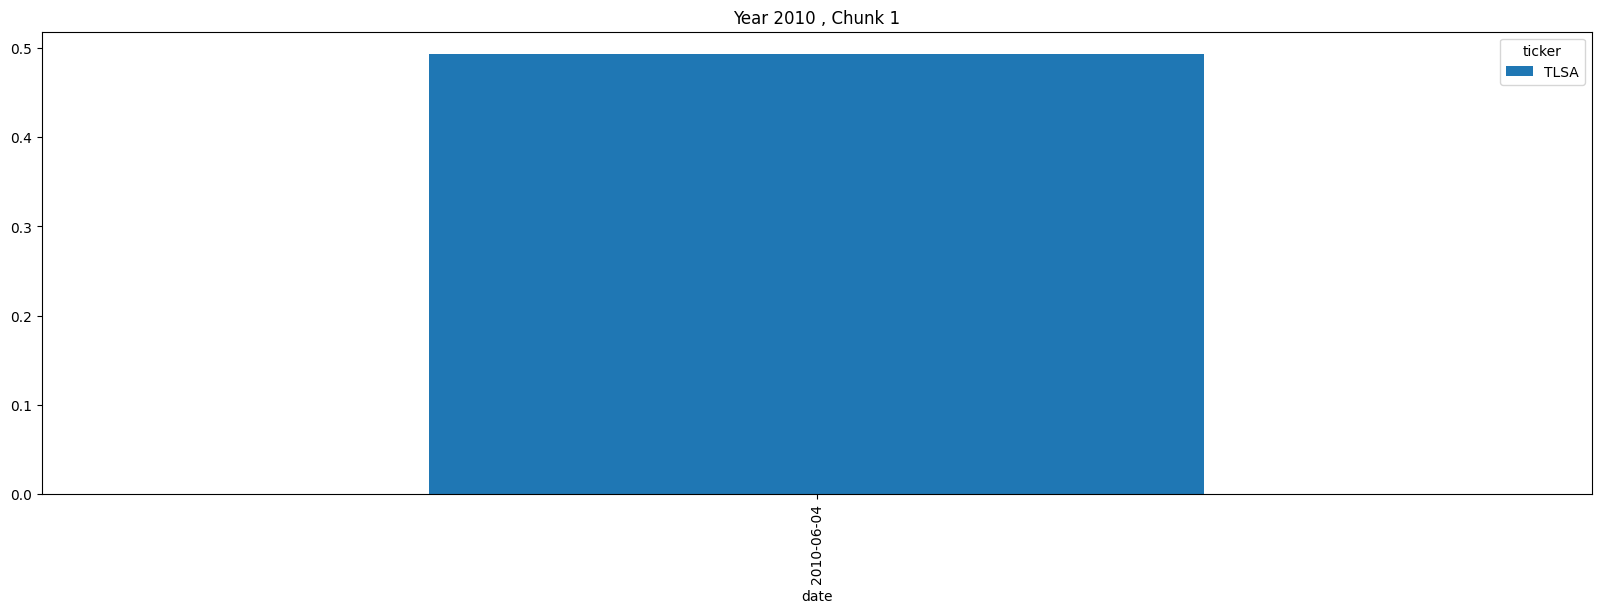

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


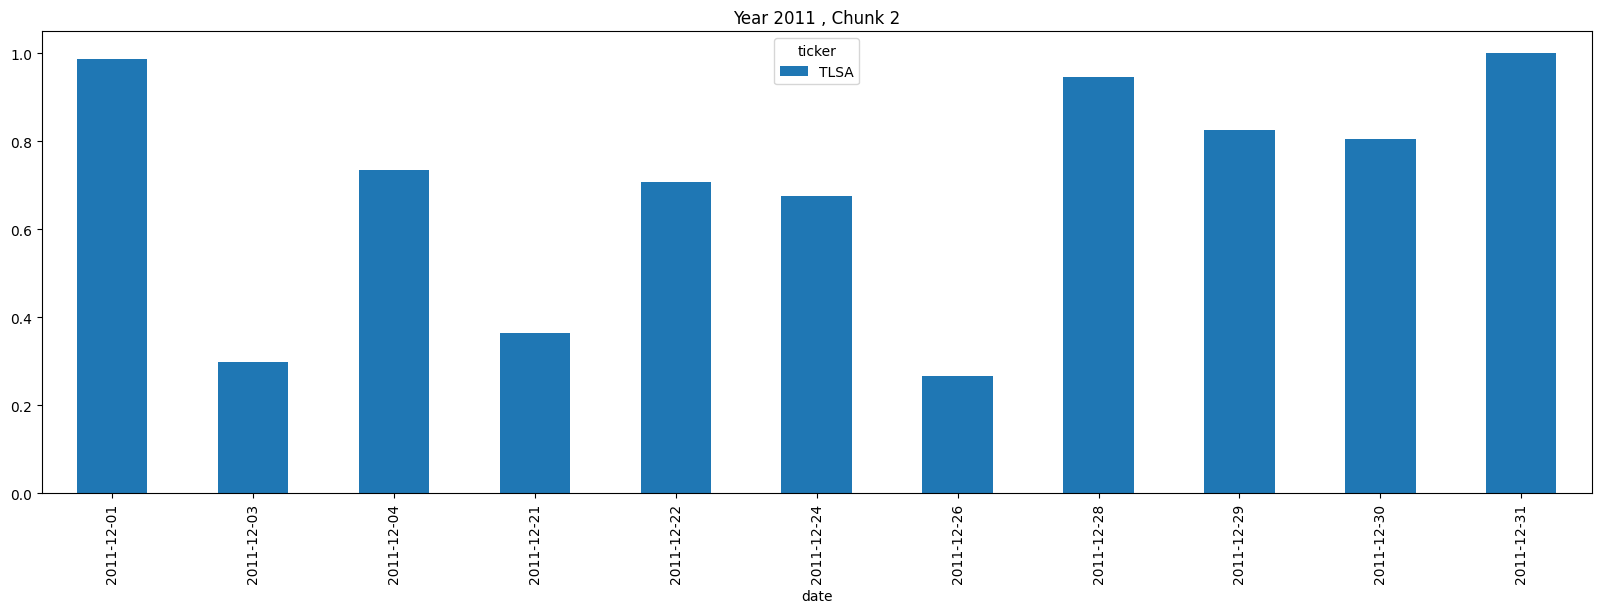

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


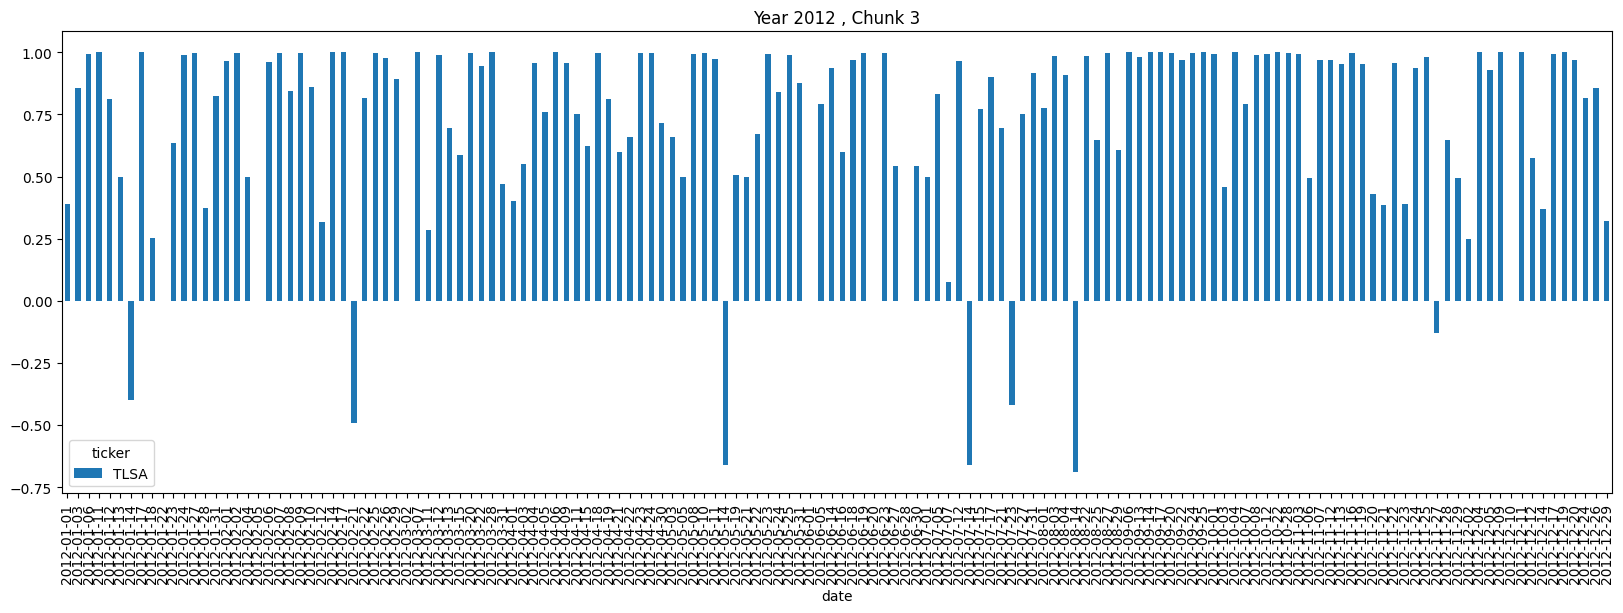

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


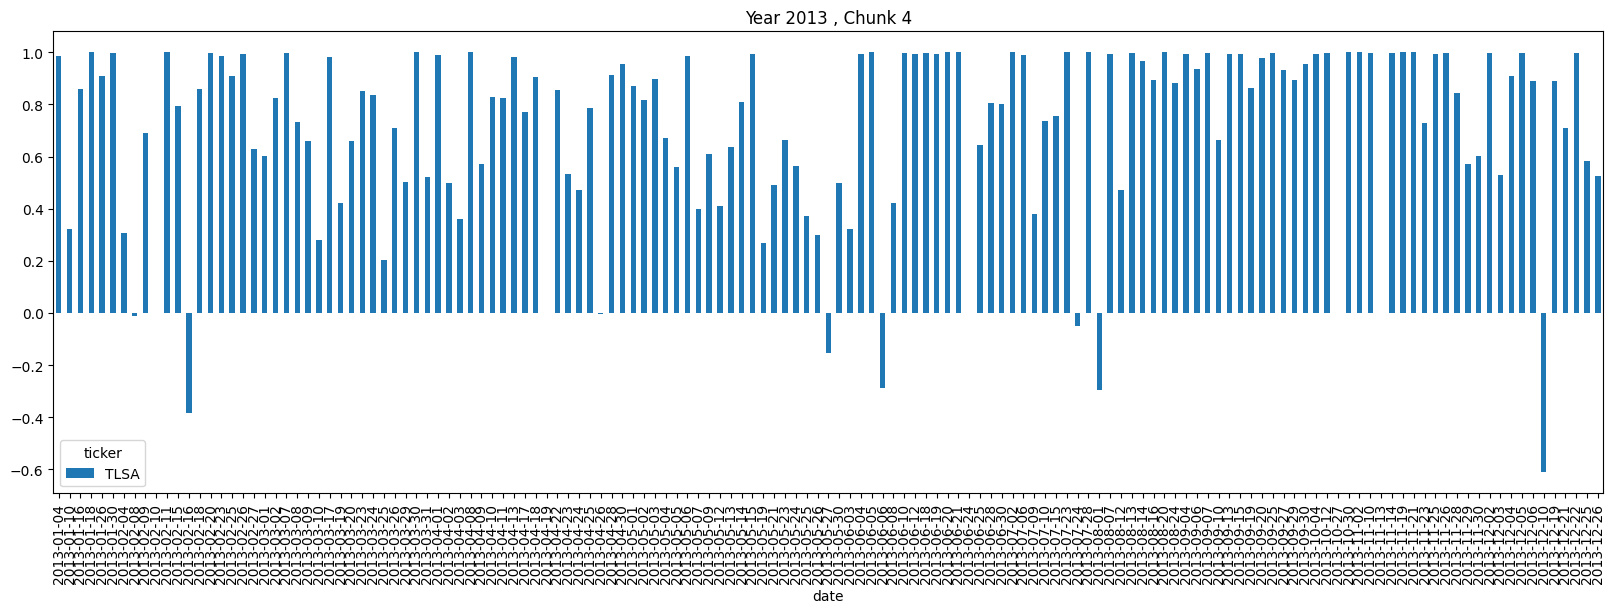

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


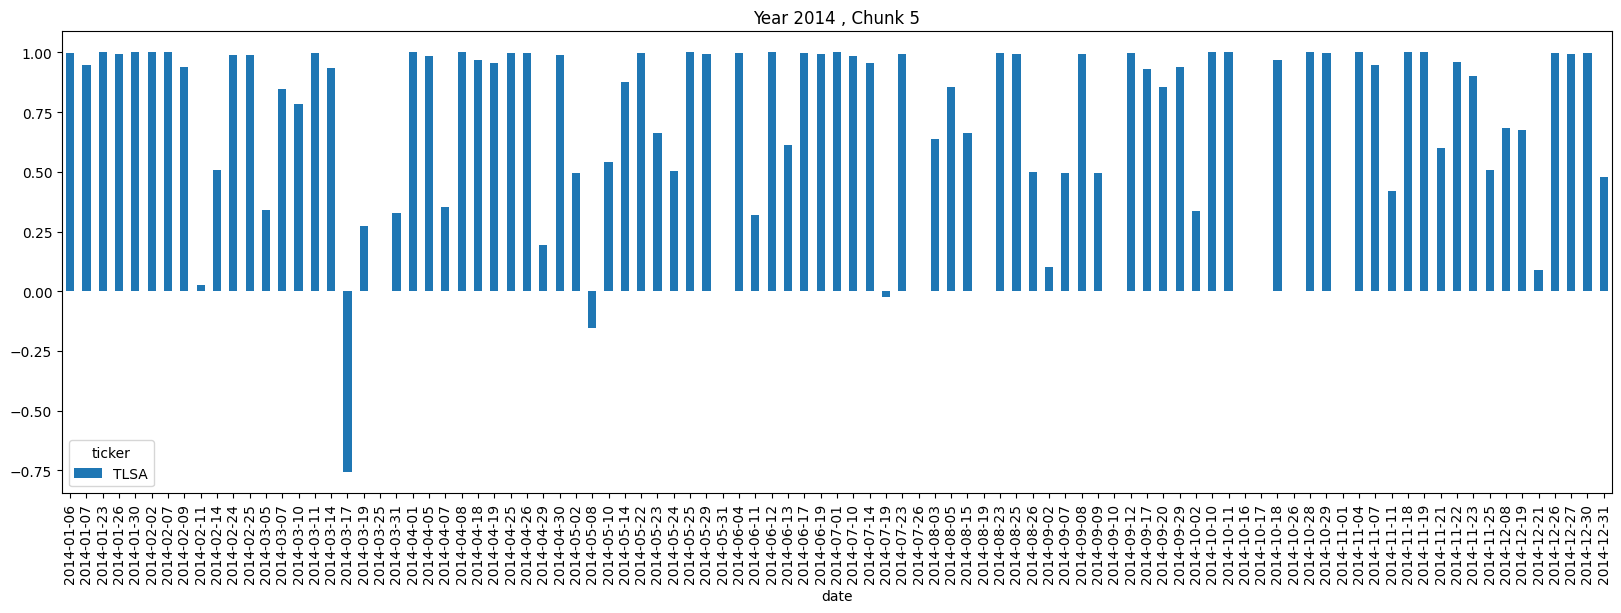

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


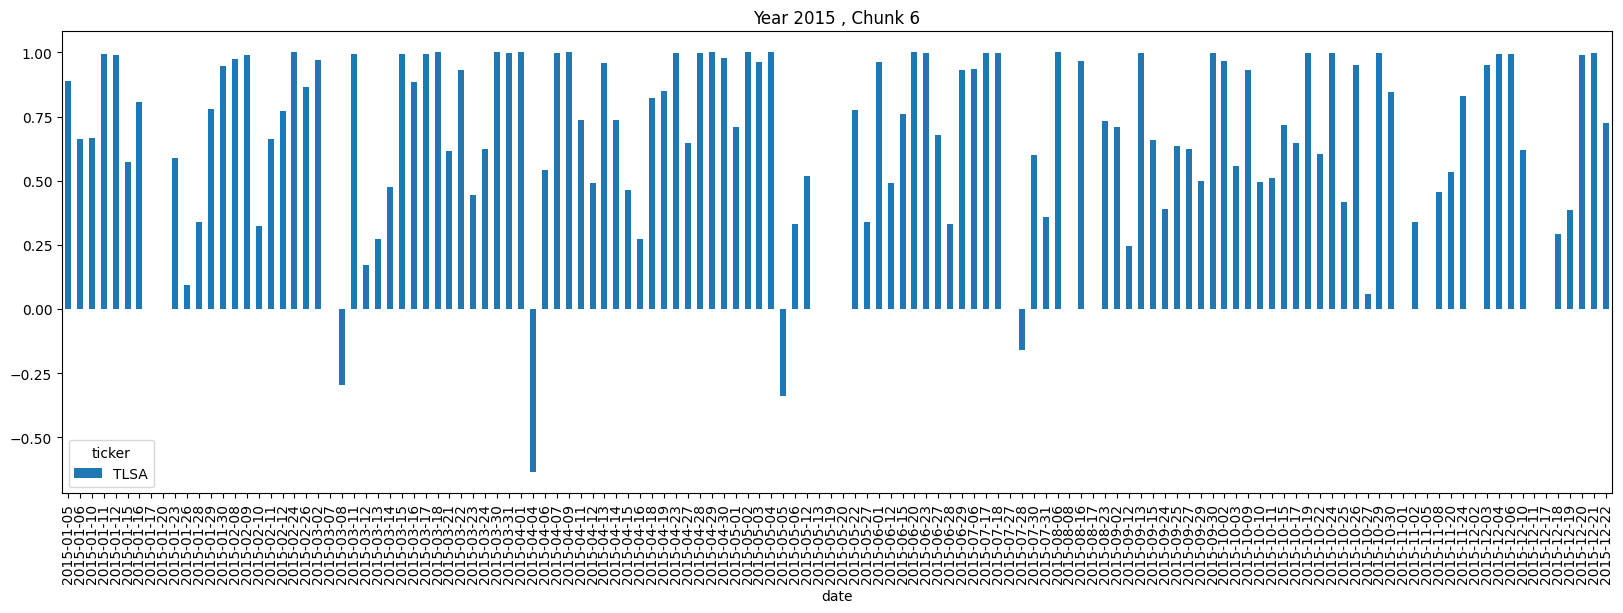

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


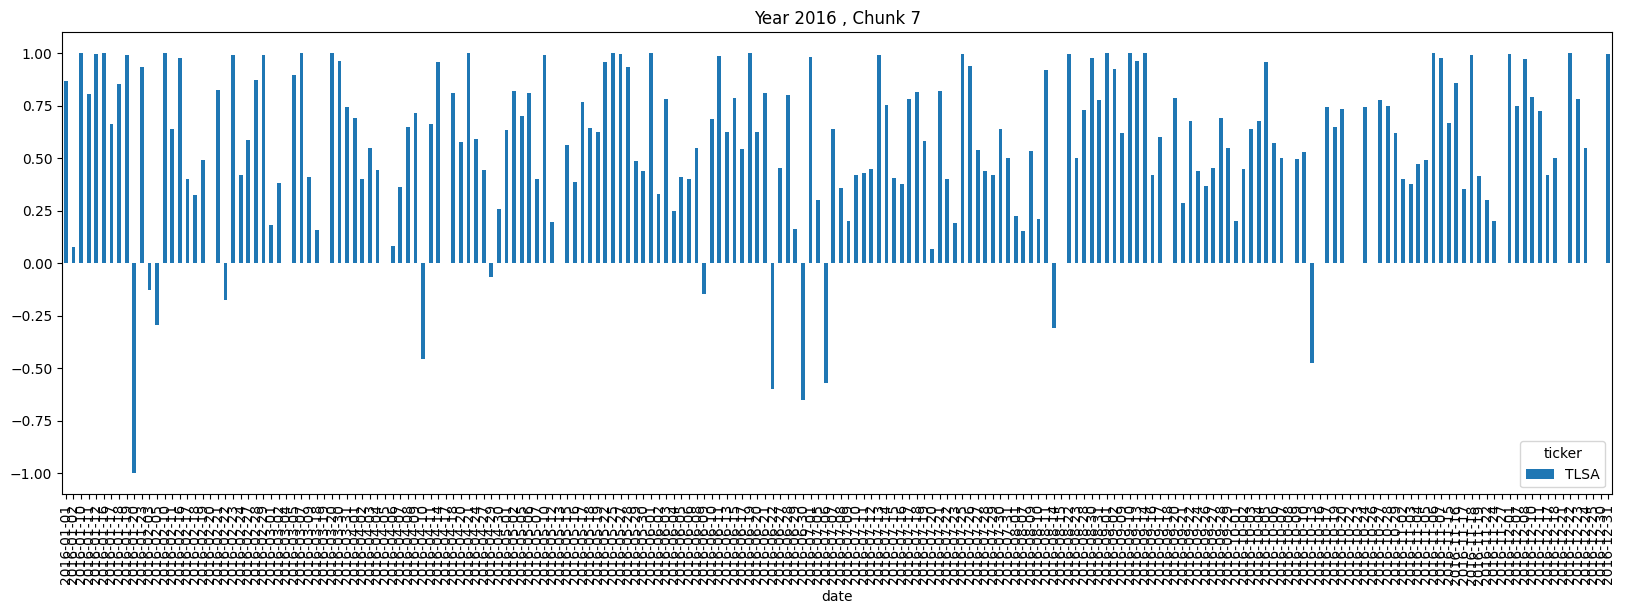

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


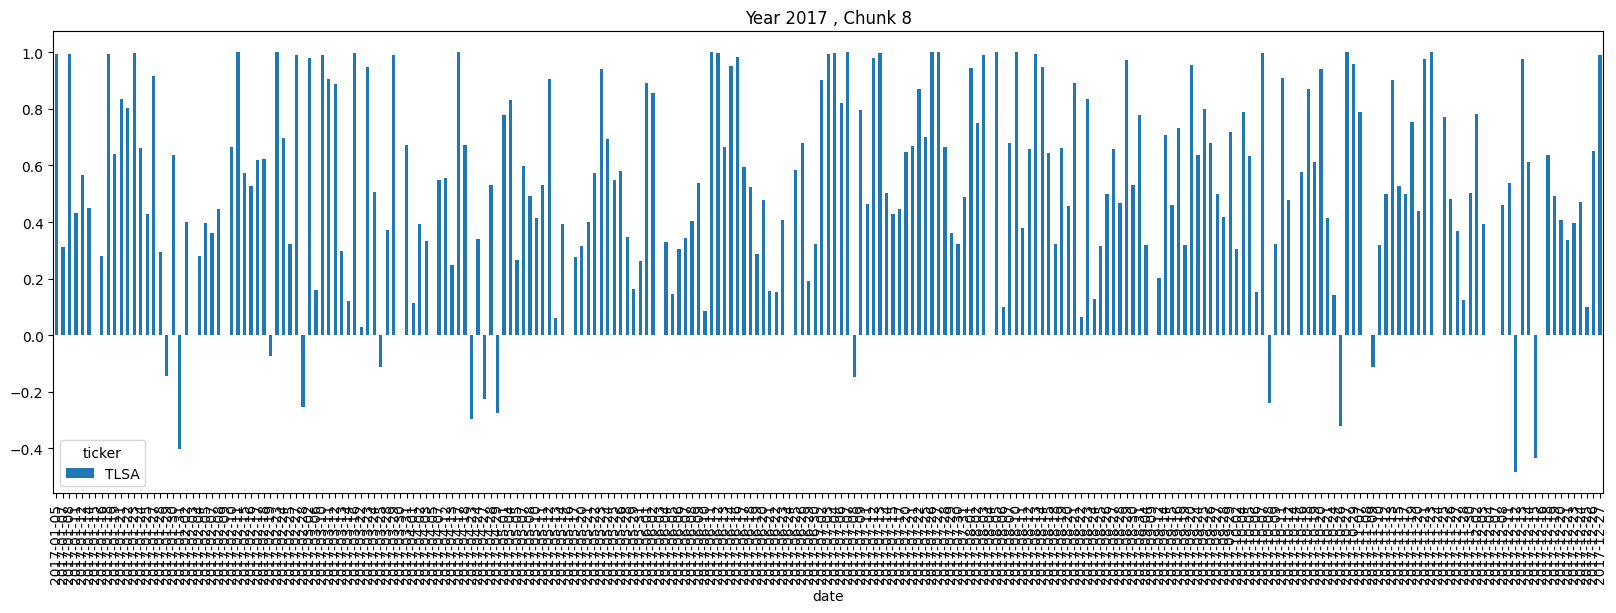

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


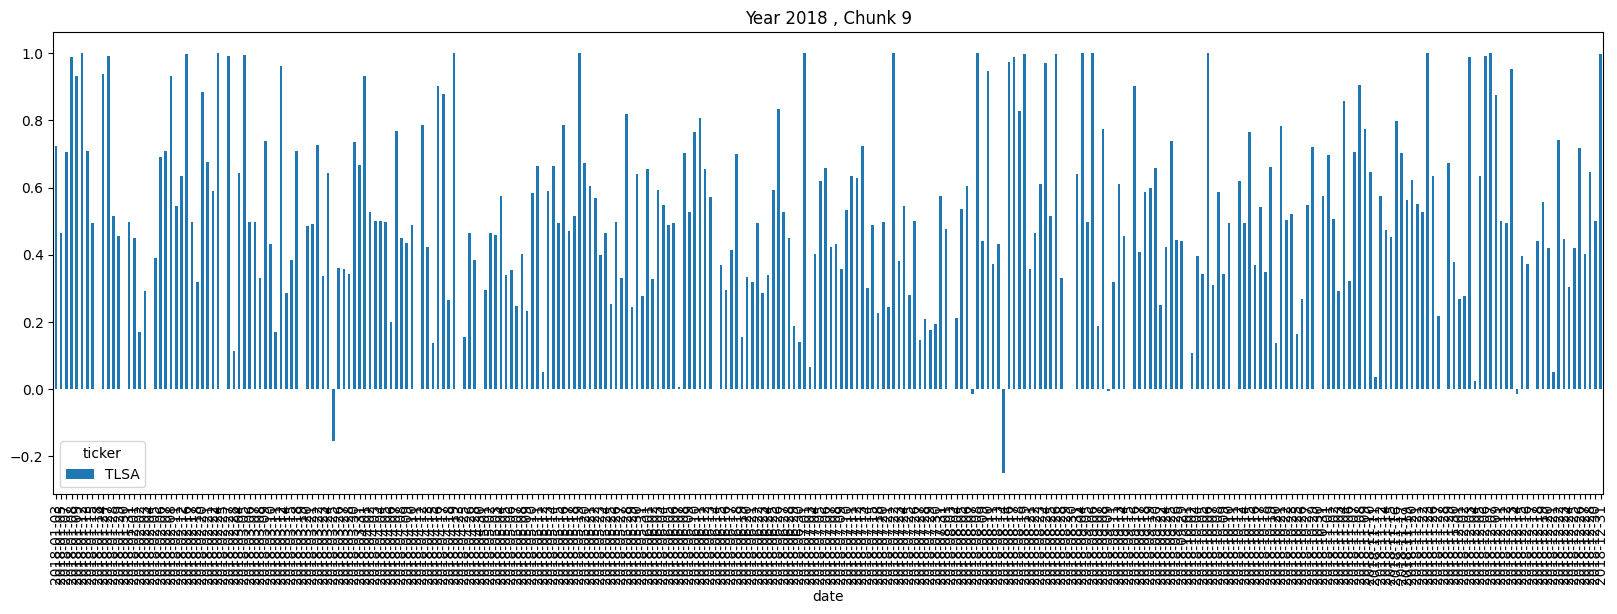

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


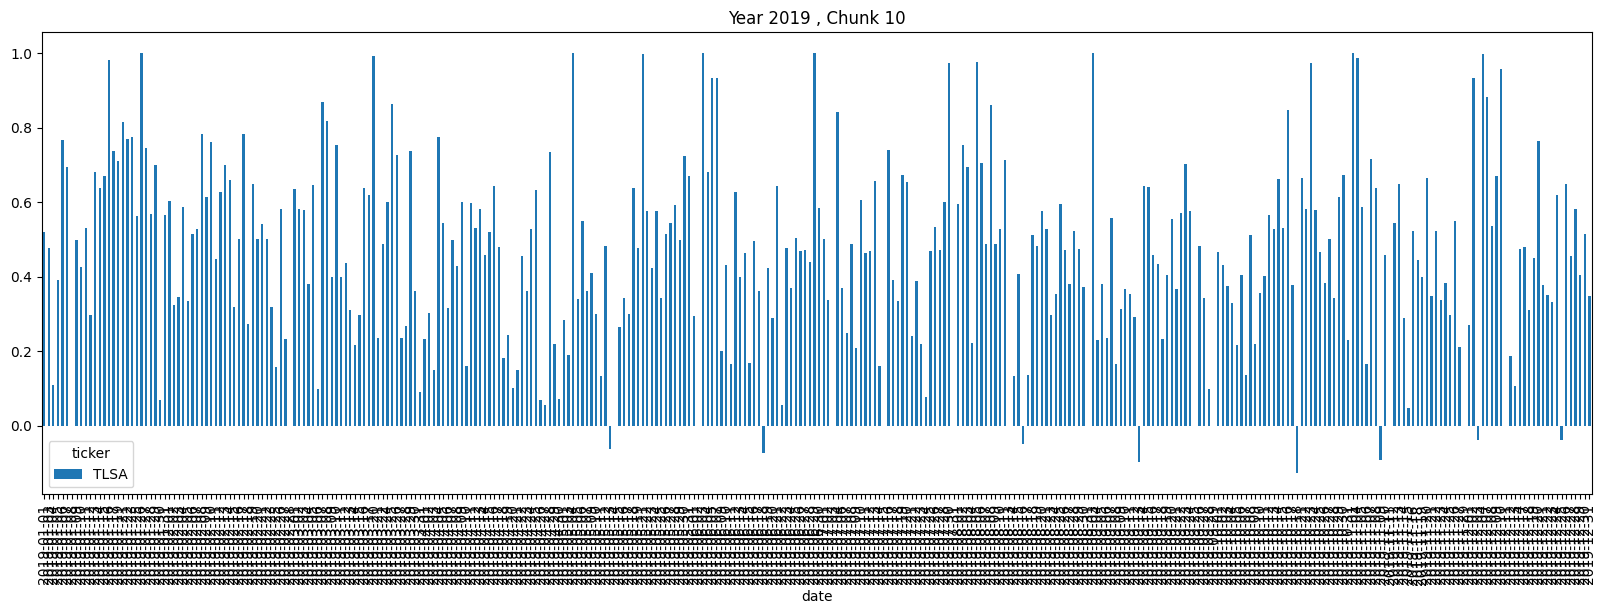

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


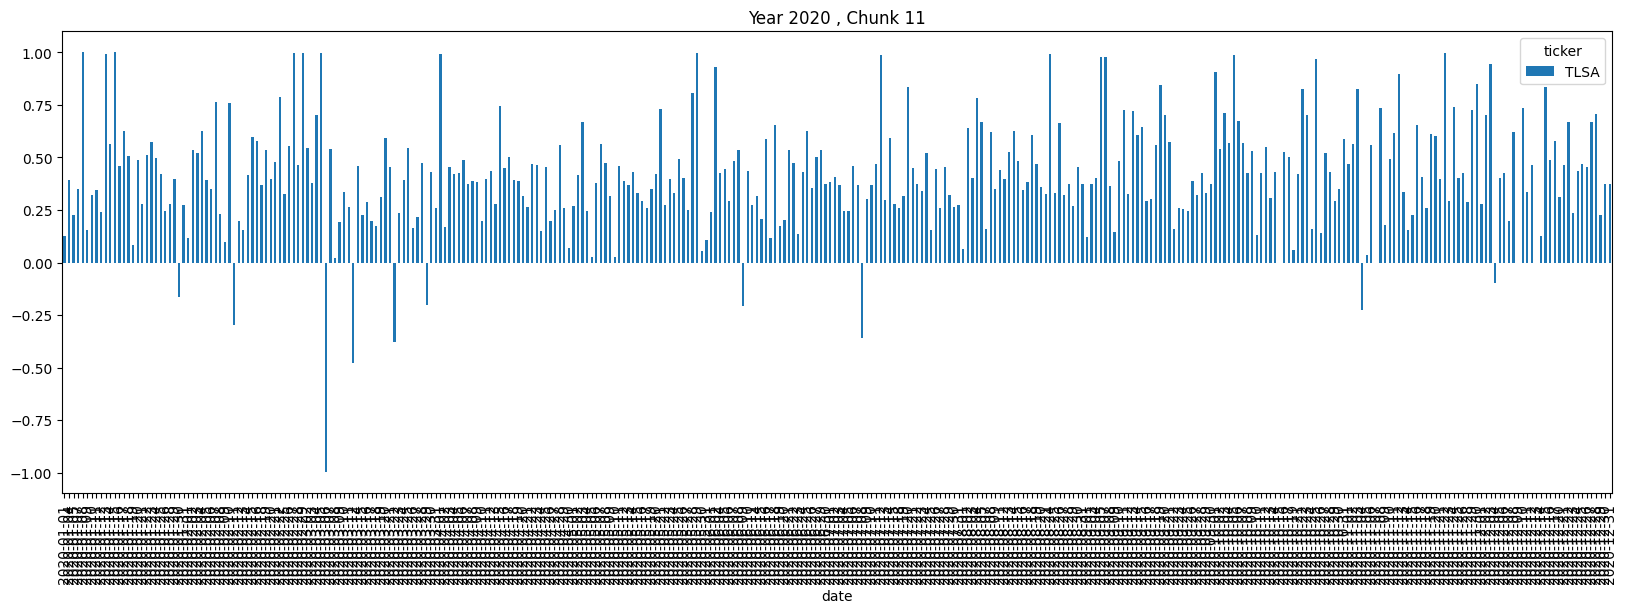

<ipython-input-27-6b56746db484>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_c = chunk.groupby(['date', 'ticker']).mean()


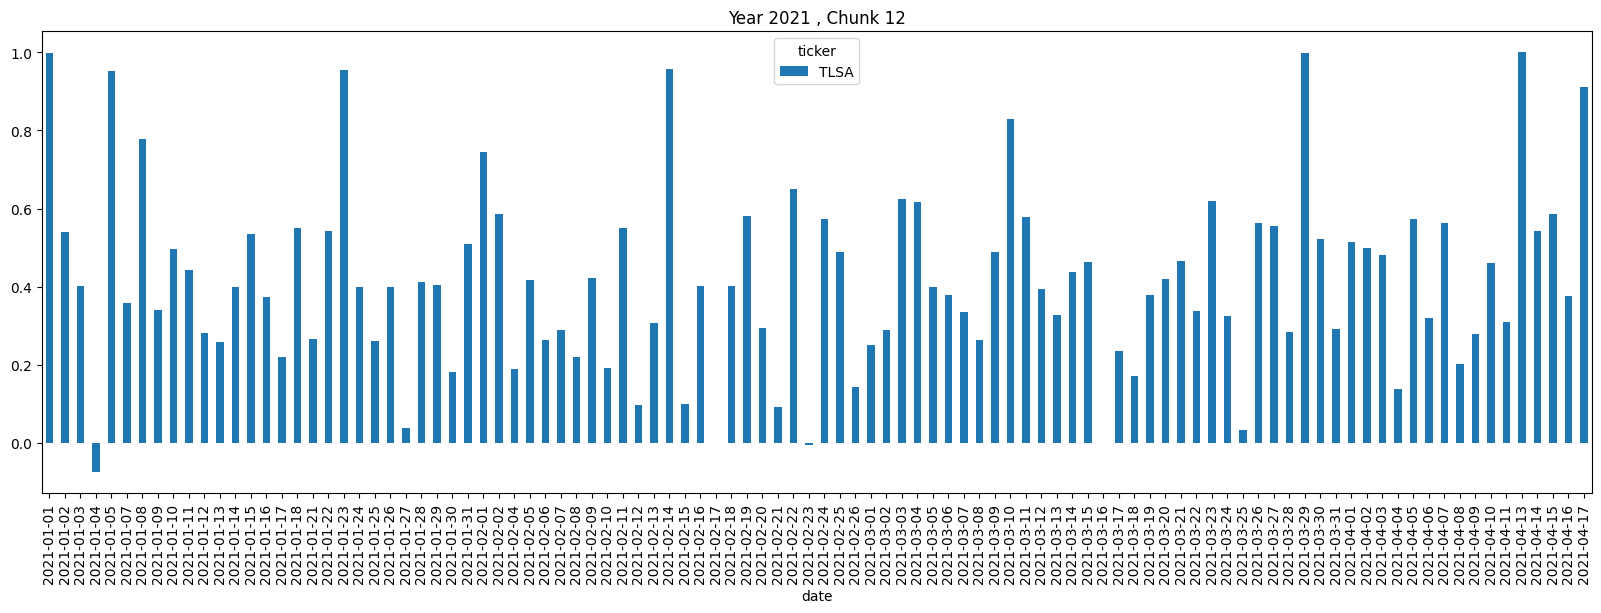

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Define the number of chunks and chunk size
num_chunks = 10
chunk_size = len(tweets) // num_chunks

# Split the DataFrame into chunks
yearly_chunks = [group for _, group in tweets.groupby(tweets['date'].dt.year)]

for i, chunk in enumerate(yearly_chunks):
    mean_c = chunk.groupby(['date', 'ticker']).mean()
    mean_c = mean_c.unstack('ticker')
    mean_c = mean_c.xs('compound', axis="columns")
    mean_c = mean_c.reset_index()  # Reset the index to include 'date' and 'ticker' in the DataFrame but as colums
    mean_c["date"]=mean_c["date"].dt.strftime('%Y-%m-%d') #I convert it to string keeping the format

    # Create a new figure and axis for each plot
    fig, ax = plt.subplots(figsize=(20, 6))

    # Plot the bar chart
    mean_c.plot.bar(x='date', ax=ax, stacked=True)  # Assuming 'date' is the column name in mean_c for x-axis



    # Set the title and show the plot
    plt.title(f'Year {i + 2010} , Chunk {i + 1}')
    plt.show()

SELECTING A PARTICULAR DAY

In [ ]:
#day with more tweets. 2018-06-17
target=reduced[reduced["Count"] ==  reduced["Count"].max()]["date"]
target_string = target.astype(str).iloc[0]
target=tweets[tweets["date"] == target_string]
target=target[["neg","neu","pos"]]
#target.columns = ['negative', 'neutral', 'positive']

PLOT 2018-06-17

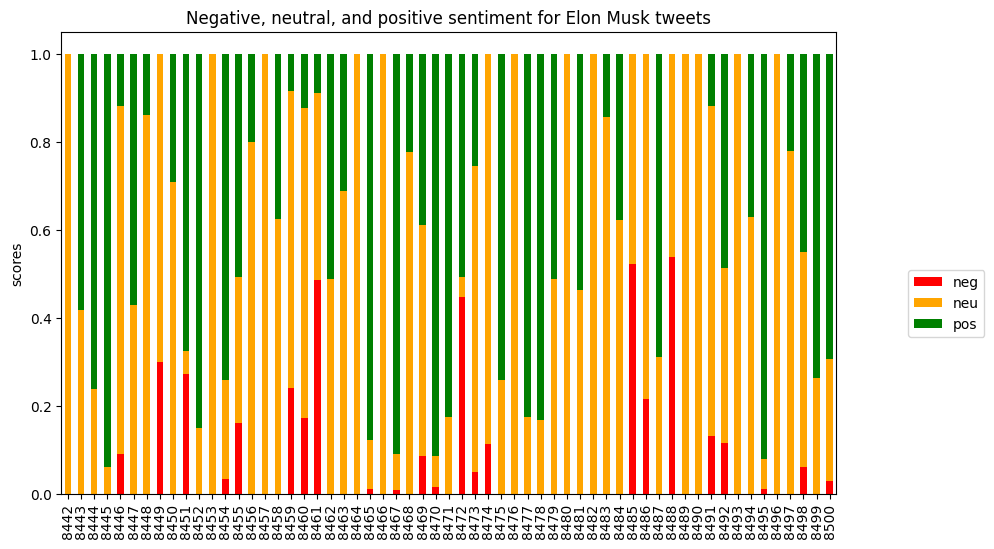

In [ ]:
TITLE = f"Negative, neutral, and positive sentiment for Elon Musk tweets"
COLORS = ["red","orange", "green"]
target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel("scores");

TSLA CLOSING PRICES

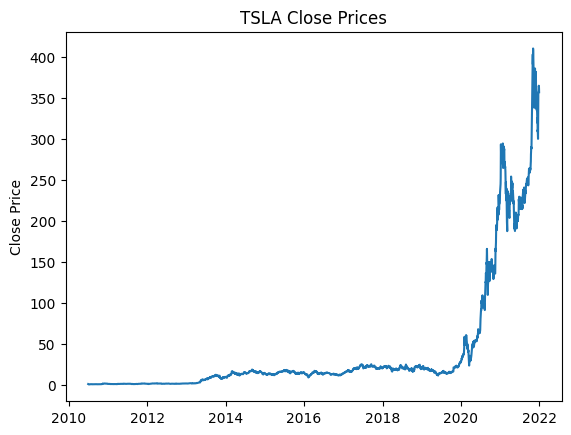

In [ ]:
tsla= pd.read_csv(os.path.join(DIR_PYTHON_PROJECT, "TSLA.csv"), index_col = False)
tsla["Date"]=pd.to_datetime(tsla["Date"])

plt.plot(tsla["Date"], tsla["Close"])  # Specify column names inside the brackets

plt.ylabel("Close Price")
plt.title("TSLA Close Prices")

plt.show()

2018 DATA

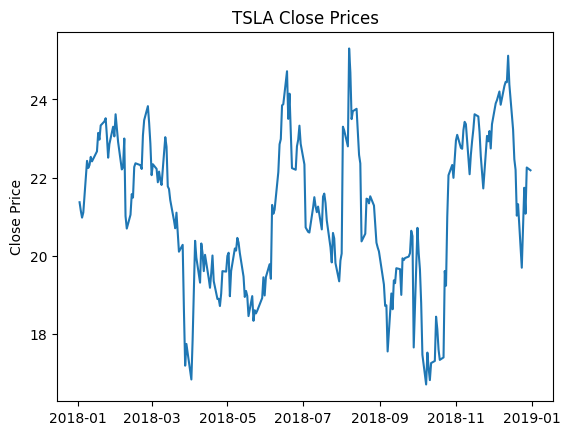

In [ ]:
tsla2021=tsla[tsla["Date"].dt.year == 2018]

plt.plot(tsla2021["Date"], tsla2021["Close"])  # Specify column names inside the brackets

plt.ylabel("Close Price")
plt.title("TSLA Close Prices")

plt.show()

MONTHLY SENTIMENT 2018

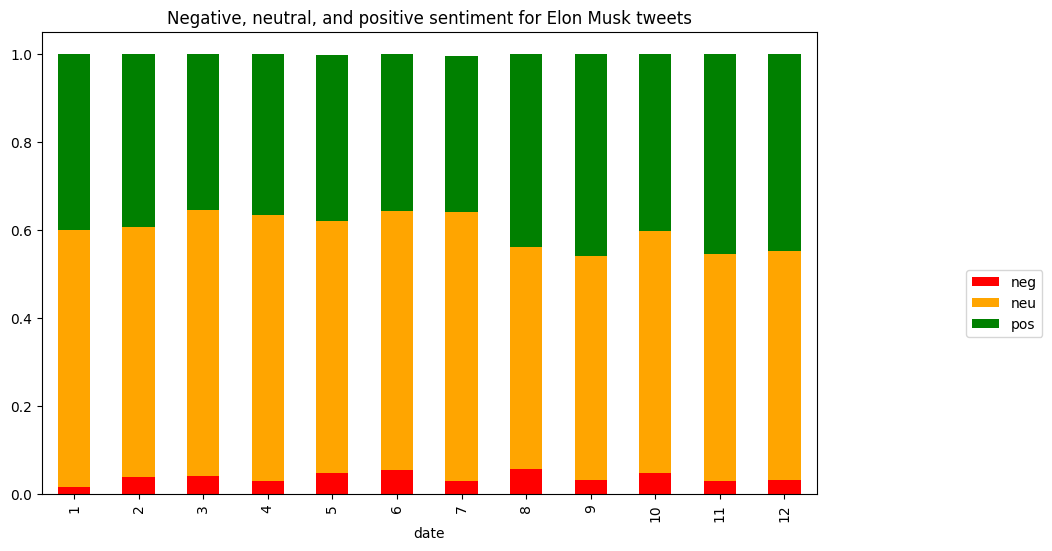

In [ ]:
#I plot 2018
target=tweets[tweets["date"].dt.year == 2018]
target=target.groupby(tweets["date"].dt.month)[["neg","neu","pos"]].mean()
target=target[["neg","neu","pos"]]

target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.3, 0.5))


AUGUST

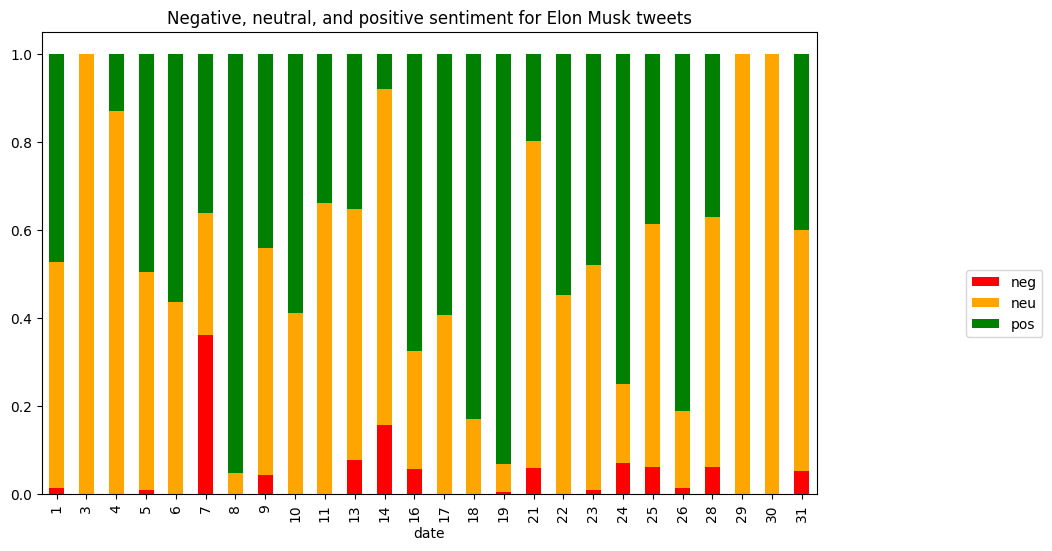

In [ ]:
target = tweets[(tweets["date"].dt.year == 2018) &
                (tweets["date"].dt.month == 8)]
target=target.groupby(tweets["date"].dt.day)[["neg","neu","pos"]].mean()
target=target[["neg","neu","pos"]]

target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.3, 0.5))

07/08/2018  "Am considering taking Tesla private at $420. Funding secured."

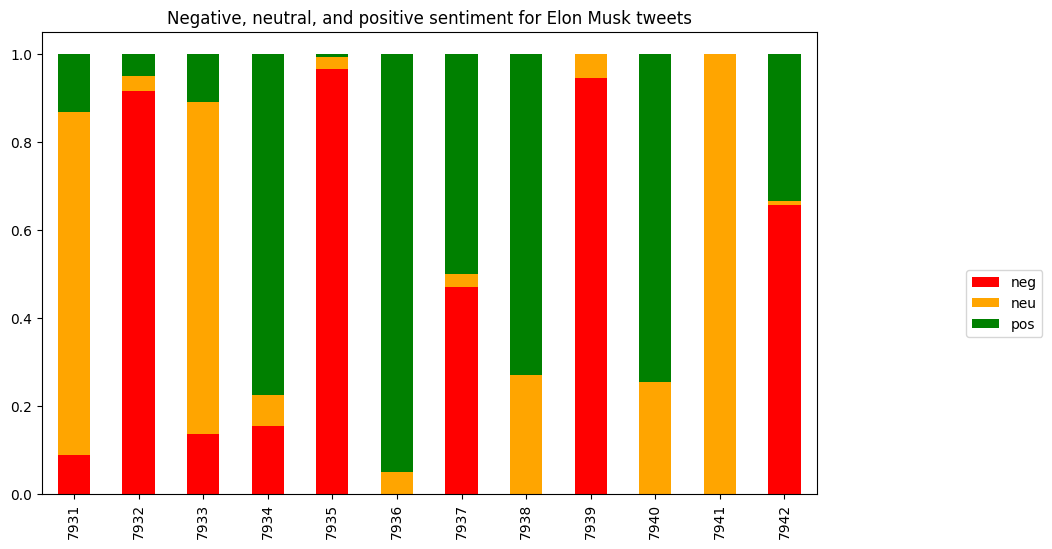

In [ ]:
target = tweets[(tweets["date"].dt.year == 2018) &
                (tweets["date"].dt.month == 8) &
                (tweets["date"].dt.day == 7)]

target=target[["neg","neu","pos"]]

target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.3, 0.5))

14/08/2018: "I’m excited to work with Silver Lake and Goldman Sachs as financial advisors, plus Wachtell, Lipton, Rosen & Katz and Munger, Tolles & Olson as legal advisors, on the proposal to take Tesla private"

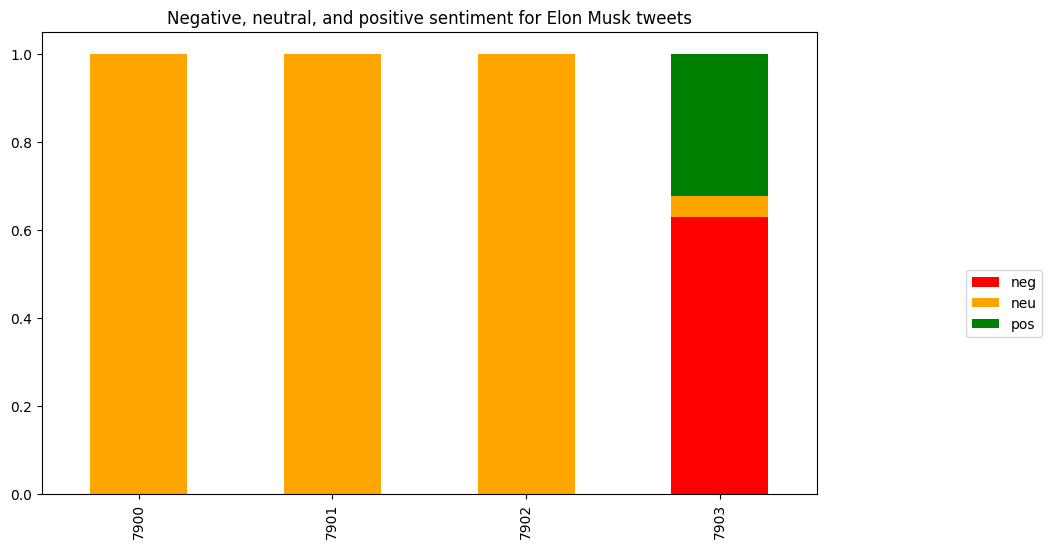

In [ ]:
target = tweets[(tweets["date"].dt.year == 2018) &
                (tweets["date"].dt.month == 8) &
                (tweets["date"].dt.day == 14)]

target=target[["neg","neu","pos"]]

target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.3, 0.5))

02/04/2018 :
"Despite intense efforts to raise money, including a last-ditch mass sale of Easter Eggs, we are sad to report that Tesla has gone completely and totally bankrupt. So bankrupt, you can't believe it"

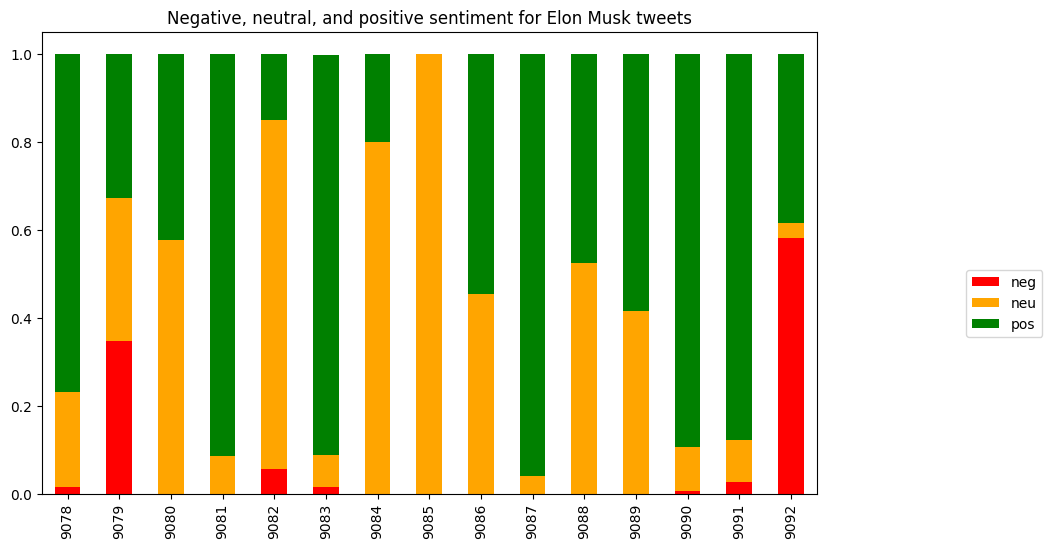

In [ ]:
target = tweets[(tweets["date"].dt.year == 2018) &
                (tweets["date"].dt.month == 4) &
                (tweets["date"].dt.day == 2)]

target=target[["neg","neu","pos"]]

target.plot.bar(stacked = True, figsize=(10, 6), title = TITLE, color = COLORS).legend(bbox_to_anchor=(1.3, 0.5))

TOP 10 MOST LIKED TWEETS

In [ ]:
#we get the 10 most liked tweets from Aug 2018
tweets_about_tesla=tweets[tweets['tweet'].str.contains(r'(?<!@)\btesla\b(?!@)', case=False, regex=True)] #tweets mention tesla

mostLikes=tweets_about_tesla[(tweets_about_tesla["date"].dt.year == 2018) &
                (tweets_about_tesla["date"].dt.month == 8)]

mostLikes = mostLikes.sort_values(by="likes_count", ascending=False)
first_10_tweets = mostLikes["tweet"].head(10)


In the graphical representation envisioned, Tesla's stock prices for August 2018 will be illustrated. Simultaneously, the graph will display the timestamps corresponding to Elon Musk's top 10 most-liked tweets related to Tesla. It's worth noting that the graph will only show six data points. This limitation stems from the fact that four of the highlighted tweets were shared over the weekend, periods for which financial data is unavailable.


1. short shorts coming soon to tesla merch
2. am considering taking tesla private at $420. funding secured.
3. if you’re into video game development, consider applying to tesla. we want to make super fun games that integrate the center touch screen, phone &amp; car irl.
4. goal is to service your car wherever you are, quietly &amp; quickly. no need to bring it to a tesla service center.
5. @ariannahuff ford &amp; tesla are the only 2 american car companies to avoid bankruptcy. i just got home from the factory. you think this is an option. it is not.
6. some of best classic @atari games coming as easter eggs in tesla v9.0 release in about 4 weeks. thanks @atari!
7. great q&amp;a @defcon last night. thanks for helping make tesla &amp; spacex more secure! planning to open-source tesla vehicle security software for free use by other car makers. extremely important to a safe self-driving future for all.
8. super appreciate free concert for tesla during this intense time! 🖤🖤
9. dang, turns o

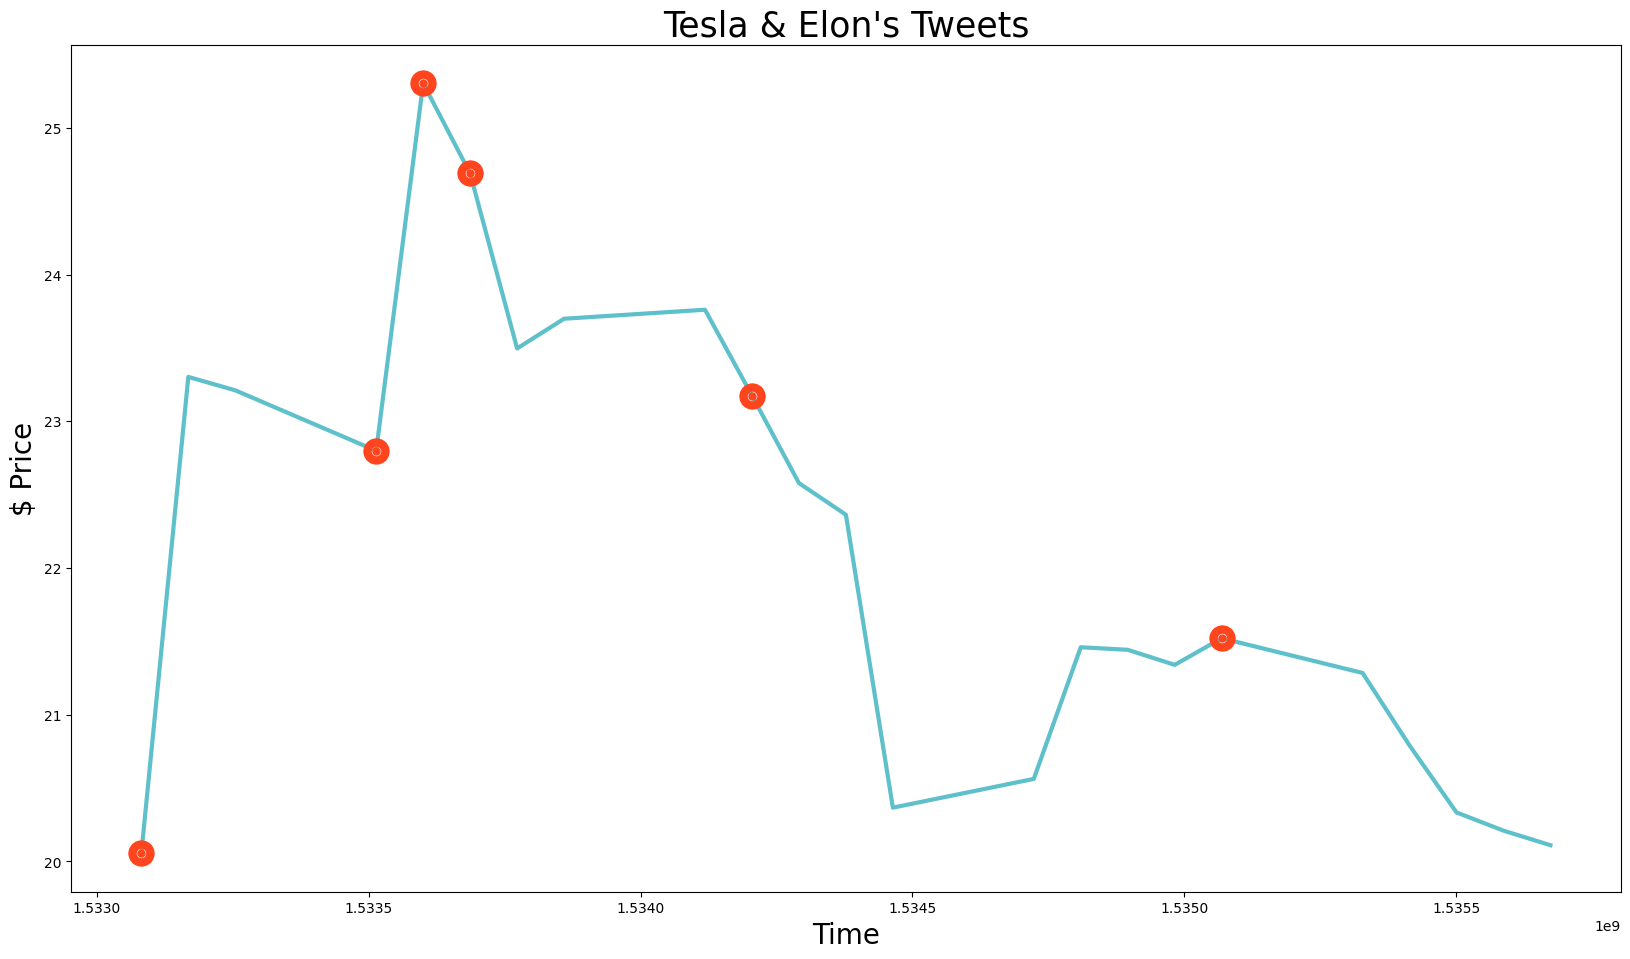

In [ ]:
my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]

import datetime
#we get the 10 most liked tweets from Aug 2018
tweets_about_tesla=tweets[tweets['tweet'].str.contains(r'(?<!@)\btesla\b(?!@)', case=False, regex=True)] #tweets mention tesla


mostLikes=tweets_about_tesla[(tweets_about_tesla["date"].dt.year == 2018) &
               (tweets_about_tesla["date"].dt.month == 8)]
mostLikes=mostLikes.sort_values(by=["likes_count"],ascending=False)
mostLikes["date"]=mostLikes["date"].dt.strftime('%Y-%m-%d')

mostLikes["date"] = mostLikes["date"].apply(lambda x: datetime.datetime.fromisoformat(x).timestamp())
timestamps = mostLikes["date"]

mostLikes

tsla_prices = tsla.sort_values(by=["Date"], ascending=False)
tsla_prices = tsla_prices[(tsla_prices["Date"].dt.year == 2018) & (tsla_prices["Date"].dt.month == 8)]


tsla_prices["Date"] = tsla_prices["Date"].dt.strftime('%Y-%m-%d')
tsla_prices["Date"] = pd.to_datetime(tsla_prices["Date"]).apply(lambda x: x.timestamp())


tsla_prices

for k, tweet in enumerate(mostLikes["tweet"][:10]):
   print(f"{k+1}.", tweet)


# Get intersection
x_values = tsla_prices[tsla_prices["Date"].isin(timestamps)]["Date"]
y_values = tsla_prices[tsla_prices["Date"].isin(timestamps)]["Adj Close"]




plt.figure(figsize = (20, 11))
for x, y in zip(x_values, y_values):


   plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)


plt.plot(tsla_prices["Date"], tsla_prices["Adj Close"], color=my_colors[3], lw=3, zorder=1)


plt.title("Tesla & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);



# Findings (Conclusions, Impact and Next Steps):

## Conclusions:


This study aims to explore the impact of Elon Musk's tweets related to Tesla on the stock prices of the company. As one of the wealthiest and most influential individuals globally, Musk's remarks on significant matters often generate widespread attention and debate. It is thus logical to presume that his statements shape investor behavior, potentially leading to a noticeable impact on the market.

After carefully analyzing the tweets from Elon Musk, extracting their sentiment and studying their relationship with the stock prices of Tesla, we have found that indeed some stock movements are caused by Musk.

We see that very popular tweets (above-average likes, comments and retweets) cause an almost immediate stock price drop or price increase. A great example is what happens in August 2018, when Elon Musk tweets about his idea of taking Tesla private. The reaction of the market is almost immediate and it has consequences in the short term: Musk's tweet pushed Tesla's stock price more than 13% above the prior day's close.  However, effects usually do not last long, since by August 17, 2018 dropped 11% below where it was before the tweet because investors were doubting if he actually could pull off the deal. Moreover, we have seen that later he tweeted again in August regarding this deal (“I’m excited to work with Silver Lake and Goldman Sachs as financial advisors, plus Wachtell, Lipton, Rosen & Katz and Munger, Tolles & Olson as legal advisors, on the proposal to take Tesla private”) making prices plunge even more.

However, it is true that in order to be able to forecast a pricing model, taking into account the tweets of Elon Musk would not be sufficient, since the relationship is not strong enough in the long term and it is not possible to forecast trends. Building a more complex and dynamic model that includes a comprehensive web scraping process, processes Tesla news and tweets in real time while applying other forecasting statistical methods would be necessary.


## Impact:

Discuss briefly the real-world implications of your findings. How can the insights from your analysis be applied to address the original question or problem?


This is a great starting point to create a model that uses real time web scraping to analyze market stock prices. In order to improve this project we would start by finding a way to have access to the Twitter data warehouse, which we have found is possible but time to obtain the license is uncertain. We would complete an extensive research that analyzes not only Elon’s Tweets but also other big influences that might impact the firm stock price.

In this project we have manually created a bag of words, another next step would be to automate this process and create a model that includes machine learning and is able to label and weight words and sentences as positive, neutral or negative, completing an exhaustive sentiment analysis. This would make the model more dynamic and complete, since it would be updated constantly and would include newly created words used by the common population.

Moreover, once we obtain an intelligent model capable of analyzing news and social media, we would include statistical parameters that would allow us to quantify relationships, correlations and, finally, compute an accurate forecast or identify mispricings in stocks. If the model was fast enough to find misprices (overvaluations and undervaluations) it would give the investor the opportunity to explode that opportunity.


## Next steps:
Provide recommendations or next steps for further investigation or action.



This project is a start of a trend that is going to grow bigger and gain importance over the next few years. Artificial intelligence, machine learning and data analytics are fields that everyday are more important in the finance field. Moreover, social media platforms are becoming each day a more relevant channel to diffuse opinions, breaking news and among new generations have even more impact than traditional media.

This new way of analyzing data can help analyze stock trends. Up until recently, most pricing and valuation tools only included mathematical and statistical concepts and formulas but never took into account online sentiment analysis, speech recognition and natural language processing research.

Nowadays the world moves faster than ever and therefore stock movements that years ago took a long time to occur after a concrete event, now happen within seconds. Models become more complex and complete and our project is part of a range of models that will gain impact within the next decade.


#Limitations

As we have previously mentioned previously, we have encountered some limitations. At first we wanted to extract real time data from Twitter so it was possible to do a web scraping process. However, we encountered some issues when trying to obtain a Twitter Developer account.

We also believe that using half hourly prices of Tesla would have made this study more accurate since effects on price after a tweet sometimes happen almost immediately. However, we only managed to easily find open and closing daily prices.

Regarding the data collection is harder as web scraping is not entirely allowed and the famous Twitter API is now restricted only to certain Twitter Developer account, it would be possible to recollect latest data but application process to obtain a developer account are time incertain, so as a workaround the latest data recopilation publicly available accounts up until April 2021, which was the one used in this project.


#Literature Review:

*   Syed Jawad Hussain Shahzad, Muhammad Anas, Elie Bouri,Price explosiveness in cryptocurrencies and Elon Musk's tweets,Finance Research Letters, Volume 47, Part B, 2022,ISSN 1544-6123, https://doi.org/10.1016/j.frl.2022.102695.
Gultekin, N. Sentiment Analysis and Topic Modelling on Twitter Activity of Elon Musk 2023

*   Yinghao Ren, Fangqing Liao, Yongjing Gong, (2020)
Impact of News on the Trend of Stock Price Change: an Analysis based on the Deep Bidirectional LSTM Model, Procedia Computer Science,
ISSN 1877-0509, https://doi.org/10.1016/j.procs.2020.06.068.
(https://www.sciencedirect.com/science/article/pii/S1877050920315829)

*   Smith, S., O’Hare, A. Comparing traditional news and social media with stock price movements; which comes first, the news or the price change?. J Big Data 9, 47 (2022). https://doi.org/10.1186/s40537-022-00591-6

*   Andrada, O. Bitcoin/Dogecoin on RAPIDS and Elon Musk, 2022

*   Dahal KR, Pokhrel NR, Gaire S, Mahatara S, Joshi RP, Gupta A, Banjade HR, Joshi J. A comparative study on effect of news sentiment on stock price prediction with deep learning architecture. PLoS One. 2023 Apr 25;18(4):e0284695. doi: 10.1371/journal.pone.0284695. PMID: 37098089; PMCID: PMC10128930.

*   The 7 Elon Musk tweets that have sent Tesla shares on a rollercoaster ride. Fortune, Peter Vercode & BLOOMBERG, 2021.






# Instructions

## Submission Requirements:

Your assignment should be submitted as a well-structured report, including text, figures, tables (Markdown cells) and Python code (Python cells) using a Jupyter Notebook (.ipynb)runing on Colab.

Document the data sources and code used in your analysis.
Make your report reader-friendly and ensure that your analysis and findings are well-explained and justified.

Submit a working Jupyter Notebook before Oct 19 00:00.

Additionally, prepare for your live presentation during the Oct 19 class, where you will demonstrate the Solution and discuss the Motivation and Findings. During the Solution demonstration show something that you learned about Python.

As a soft deadline to kick off your project, consider submitting me via email your idea of project, group composition (1, 2 or 3 persons) and data source before Oct 6.

If you lack inspiration, consider looking at Open Data initiatives like for example the one by [French Government](https://www.data.gouv.fr/en/), or any other Area/Region/Country office of statistics/Internationnal Organization etc.



## Grading Criteria:

Your assignment will be graded based on the following criteria:

* Clarity and relevance of the data-driven question or problem. (10%)

* The Solution:

    * Quality of data collection and preparation,

    * Depth and effectiveness of data exploration,

    * Richness of the data analysis and its results. Alignment with the initial question or problem,

    * Appropriateness of the modeling techniques (if used),

    * Quality of the Python code: correct (runs with no errors), readable, modular (don't repeat yourself, use functions), documented (use text cells, use comments within code, document functions with docstrings),

    * Altogether (60%, with 30% allocated to the Python code).

* Findings. (10%)

* Your presentation. (20%)

## Additional Tips:

I encourage you to select data sets and questions that genuinely interest you to drive your motivation.